In [1]:
# Imports
import sys
import pandas as pd
import geopandas as gpd
from shapely import geometry
import osmnx as ox
import os
import matplotlib.pyplot as plt
# quetzal-specific stuff
from syspy.spatial.graph.graphbuilder import GraphBuilder, OsmnxCleaner
from syspy.spatial.graph import graphbuilder
from quetzal.io.gtfs_reader import importer
from quetzal.model import stepmodel


#Added in from Cody 10.Aug.
import os.path
sys.path.append(os.path.expanduser('/Users/codygelbrich/Desktop/nic/Term_Paper/quetzal/syspy'))
sys.path.append(os.path.expanduser('/Users/codygelbrich/Desktop/nic/Term_Paper/quetzal/syspy/graph'))
sys.path.append(os.path.expanduser('/Users/codygelbrich/Desktop/nic/Term_Paper/quetzal'))

sys.path.append('/Users/codygelbrich/Desktop/nic/Term_Paper/quetzal') 





In [2]:
training_folder = '/Users/codygelbrich/Desktop/nic/Term_Paper/Johanna Ex.'
input_folder = training_folder + r'data/'

## Zones

Load zone data from the input files

In [3]:
#zones

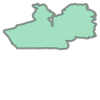

In [4]:
zones = gpd.read_file(r'../data/zonesv1.geojson')
hull = zones["geometry"].buffer(1e-3).unary_union
#geometry.MultiPolygon(zones['geometry'].values).buffer(1e-3)
hull

## Road network

Build the road network graph from OpenStreetMap data and save it into GeoDataFrames

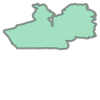

In [5]:
zoneF = gpd.read_file(r'../data/zone13Kopie.geojson')
hullF = zones["geometry"].buffer(1e-3).unary_union
#geometry.MultiPolygon(zones['geometry'].values).buffer(1e-3)
hullF

In [6]:
zoneF

,type,pop,AREA,name,index,emp,id,pop_dens,emp_dens,geometry
0,multipolygon,7607,2970340.69,Muerwik-2,zone_10,2314,10,0.003,0.00078,"MULTIPOLYGON (((9.49141 54.81826, 9.49151 54.8..."
1,multipolygon,12160,4032961.52,Nordstadt,zone_2,3834,2,0.003,0.00095,"MULTIPOLYGON (((9.42829 54.80005, 9.42828 54.8..."
2,multipolygon,4170,5254176,suedstadt,zone_6,4008,6,0.001,0.00053,"MULTIPOLYGON (((9.44880 54.75180, 9.45189 54.7..."
3,multipolygon,7607,3549296.74,Muerwik-1,zone_9,4627,9,0.002,0.0013,"MULTIPOLYGON (((9.45215 54.80729, 9.45297 54.8..."
4,multipolygon,7435,8073283.42,Weiche,zone_5,2551,5,0.001,0.00032,"MULTIPOLYGON (((9.36144 54.77498, 9.36481 54.7..."
5,multipolygon,6909,2513307.48,Fruerlund,zone_8,2410,8,0.003,0.00096,"MULTIPOLYGON (((9.43779 54.79169, 9.43770 54.7..."
6,multipolygon,6696,4199743.1,Friesiche_Berg,zone_4,2454,4,0.002,0.00058,"MULTIPOLYGON (((9.37525 54.78545, 9.37456 54.7..."
7,multipolygon,6731,2251790,Sandberg,zone_13,4008,13,None,0.00053,"MULTIPOLYGON (((9.43889 54.77666, 9.44185 54.7..."
8,multipolygon,8424,1402414.74,Juergensby,zone_7,3091,7,0.006,0.0022,"MULTIPOLYGON (((9.43616 54.78844, 9.43649 54.7..."
9,multipolygon,12584,8946281.9,Engelsby_Tarup,zone_11,4393,11,0.001,0.00049,"MULTIPOLYGON (((9.50180 54.80515, 9.50135 54.8..."


In [7]:
# Drop zone Altstadt & Neustadt 
# Hier wird die Zone für Autos gelöscht. 
# Alle über 30% werden aus dem Modell gelöscht
#31\% Neustadt: Jüngster Bezirk. 
#33,5\% Sandberg: durch Nähe zur Uni
#34,3\% Altstadt 


zoneA = zoneF.drop(11)
#Variablen überschreiben sich. Deswegen zwei namen 

zoneF = zoneA.drop(7)


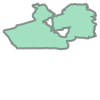

In [8]:
hullF = zoneF["geometry"].buffer(1e-3).unary_union
hullF


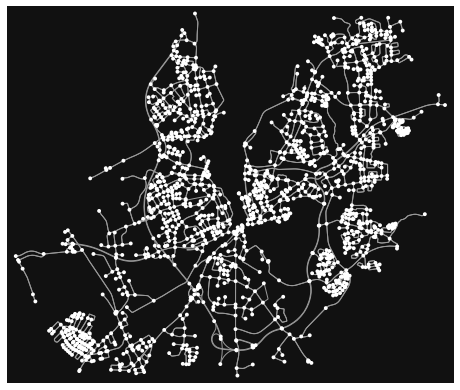

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
# Download roads from OpenStreetMap (online) and save it in a graph
# using the OSMNX library
drive = ox.graph_from_polygon(hullF, network_type='drive')
# Plot it
ox.plot_graph(drive)

In [10]:
# Use OSMNX function to create GeoDataFrames from graph
road_nodes, road_links = ox.graph_to_gdfs(drive)

In [11]:
road_nodes = road_nodes.reset_index()

In [12]:
# Let's have a look at the results
road_nodes.head(5)

,osmid,y,x,street_count,highway,geometry
0,26012989,54.761671,9.396664,3,NaN,POINT (9.39666 54.76167)
1,26012995,54.755484,9.402495,4,traffic_signals,POINT (9.40250 54.75548)
2,26013102,54.804837,9.423669,3,NaN,POINT (9.42367 54.80484)
3,26013139,54.805033,9.474248,4,traffic_signals,POINT (9.47425 54.80503)
4,26013154,54.806058,9.458361,3,NaN,POINT (9.45836 54.80606)


In [13]:
road_links = road_links.reset_index()

In [14]:
road_links.head(2)

,u,v,key,osmid,lanes,ref,name,highway,maxspeed,oneway,length,geometry,bridge,junction,width,access,tunnel
0,26012989,654163464,0,79258351,2,K 27,Ochsenweg,secondary,30,False,183.731,"LINESTRING (9.39666 54.76167, 9.39697 54.76126...",NaN,NaN,NaN,NaN,NaN
1,26012989,654163515,0,"[79263955, 51269724]",NaN,NaN,Hooger Weg,residential,30,False,275.879,"LINESTRING (9.39666 54.76167, 9.39708 54.76178...",NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

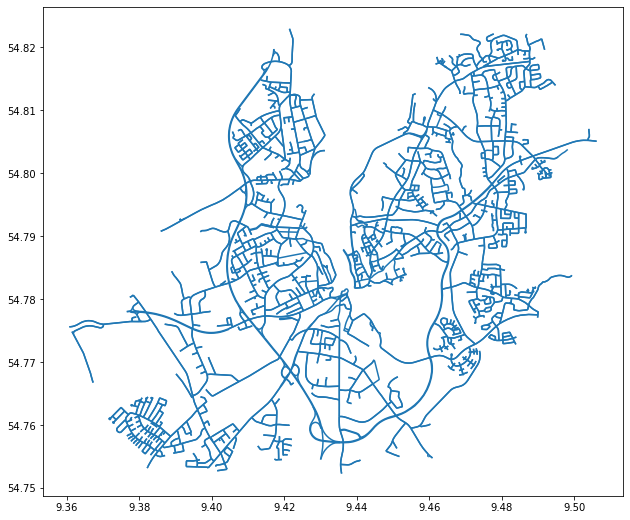

In [15]:
road_links.plot(figsize=(16,9))

In [16]:
# Check if the columns you want to use later are in the columns above.
# If they appear as index names (printed bold), use the reset_index()
# function to create a new Data
dataTypeSeries = road_nodes.dtypes
print(dataTypeSeries)


osmid              int64
y                float64
x                float64
street_count       int64
highway           object
geometry        geometry
dtype: object


In [17]:
# Rename columns and make them type string for later operations
road_links.rename(columns={'u': 'from', 'v': 'to'}, inplace=True)
#road_links[['from', 'to']] = road_links[['from', 'to']].astype(str)
road_nodes['osmid'] = road_nodes['osmid'].astype(str)
road_nodes = road_nodes.set_index('osmid')[['geometry']]
road_links[['from', 'to']] = road_links[['from', 'to']].astype(str)

In [18]:
# We can drastically reduce the disc space needed for this table by
# reducing the complexity of LineString geometries.
# For our purpose it is enough to have the start and end point of a link.
# Let's write a function
def simplify_link(g):
    l = list(g.coords)
    return geometry.LineString([l[0], l[-1]])
# Apply the function to all our links
road_links['geometry'] = road_links['geometry'].apply(simplify_link)

In [19]:
# Create a cleaner object and run cleaning functions on it
oc = OsmnxCleaner(
    road_links, 
    road_nodes, 
    a='from', 
    b='to'
)

In [20]:
oc.add_reversed_links(
    direction_column='oneway', 
    reverse_value=False # the boolean has been stored as a string    
)
#oc.clean_geometries() # Doesn't work, but let's hope we don't need it
oc.fix_nodeset_consistency()

In [21]:
oc.__dict__.keys()

dict_keys(['links', 'nodes'])

Our road network is now saved in `oc.nodes` and `oc.links`

## Walk

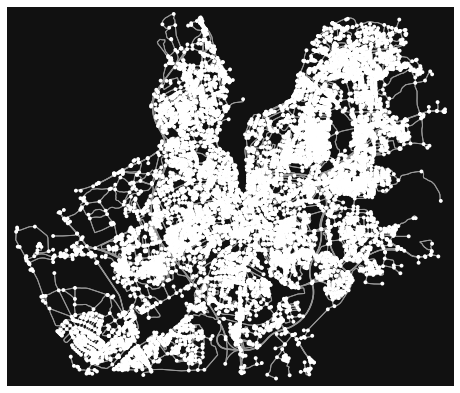

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [22]:
# Download roads from OpenStreetMap (online) and save it in a graph
# using the OSMNX library
walk = ox.graph_from_polygon(hull, network_type='walk')
# Plot it
ox.plot_graph(walk)

In [23]:
# Use OSMNX function to create GeoDataFrames from graph
footpath_nodes, footpath_links = ox.graph_to_gdfs(walk)

In [24]:
footpath_nodes = footpath_nodes.reset_index()

In [25]:
# Let's have a look at the results
footpath_nodes.head(5)

,osmid,y,x,street_count,highway,geometry
0,21929576,54.822503,9.468561,3,NaN,POINT (9.46856 54.82250)
1,26012979,54.774861,9.385369,4,NaN,POINT (9.38537 54.77486)
2,26012989,54.761671,9.396664,3,NaN,POINT (9.39666 54.76167)
3,26012995,54.755484,9.402495,4,traffic_signals,POINT (9.40250 54.75548)
4,26013099,54.807367,9.422835,3,NaN,POINT (9.42283 54.80737)


In [26]:
footpath_links = footpath_links.reset_index()

In [27]:
footpath_links.head(2)

,u,v,key,osmid,highway,oneway,length,geometry,service,lanes,ref,name,maxspeed,bridge,junction,access,width,tunnel
0,21929576,9077610843,0,981344824,path,False,6.139,"LINESTRING (9.46856 54.82250, 9.46864 54.82253)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21929576,1851263511,0,174437297,path,False,31.839,"LINESTRING (9.46856 54.82250, 9.46840 54.82257...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

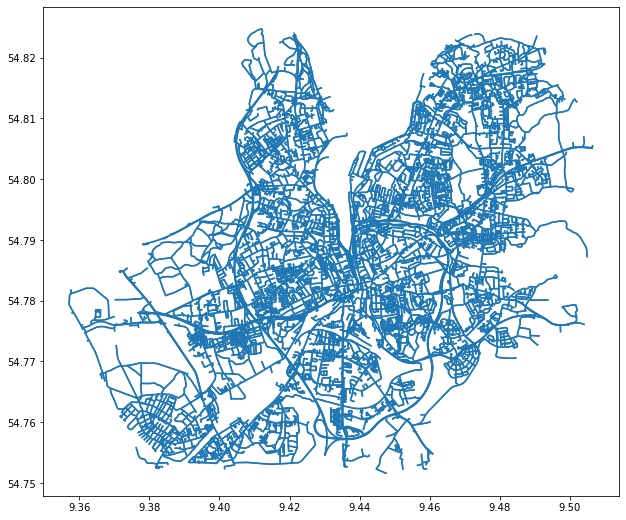

In [28]:
footpath_links.plot(figsize=(16,9))

In [29]:
# Check if the columns you want to use later are in the columns above.
# If they appear as index names (printed bold), use the reset_index()
# function to create a new Data
dataTypeSeries = footpath_nodes.dtypes
print(dataTypeSeries)
footpath_nodes.columns.values

osmid              int64
y                float64
x                float64
street_count       int64
highway           object
geometry        geometry
dtype: object


array(['osmid', 'y', 'x', 'street_count', 'highway', 'geometry'],
      dtype=object)

In [30]:
# Rename columns and make them type string for later operations
footpath_links.rename(columns={'u': 'from', 'v': 'to'}, inplace=True)
footpath_links[['from', 'to']] = footpath_links[['from', 'to']].astype(str)
footpath_nodes['osmid'] = footpath_nodes['osmid'].astype(str)
footpath_nodes = footpath_nodes.set_index('osmid')[['geometry']]
footpath_links[['from', 'to']] = footpath_links[['from', 'to']].astype(str)

In [31]:
# We can drastically reduce the disc space needed for this table by
# reducing the complexity of LineString geometries.
# For our purpose it is enough to have the start and end point of a link.
# Let's write a function
def simplify_link(g):
    l = list(g.coords)
    return geometry.LineString([l[0], l[-1]])
# Apply the function to all our links
footpath_links['geometry'] = footpath_links['geometry'].apply(simplify_link)

In [32]:
# Create a cleaner object and run cleaning functions on it
wk = OsmnxCleaner(
    footpath_links, 
    footpath_nodes, 
    a='from', 
    b='to'
)

In [33]:
wk.add_reversed_links(
    direction_column='oneway', 
    reverse_value=False # the boolean has been stored as a string    
)
#wk.clean_geometries() # Doesn't work, but let's hope we don't need it
wk.fix_nodeset_consistency()

In [34]:
wk.__dict__.keys()

dict_keys(['links', 'nodes'])

The walk network is saved in wk.nodes and wk.links

## Cycling

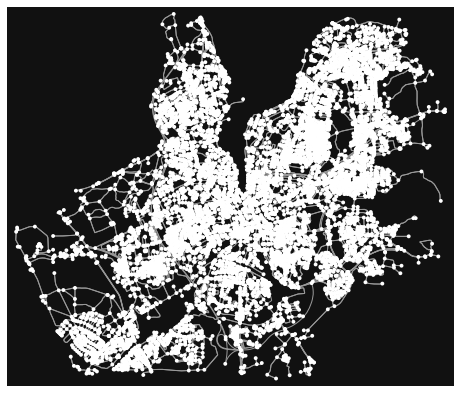

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [35]:
# Download roads from OpenStreetMap (online) and save it in a graph
# using the OSMNX library
cycling = ox.graph_from_polygon(hull, network_type='bike')
# Plot it
ox.plot_graph(cycling)

In [36]:
# Use OSMNX function to create GeoDataFrames from graph
bikelane_nodes, bikelane_links = ox.graph_to_gdfs(cycling)

In [37]:
bikelane_nodes = bikelane_nodes.reset_index()

In [38]:
# Let's have a look at the results
bikelane_nodes.head(5)

,osmid,y,x,street_count,highway,geometry
0,21929576,54.822503,9.468561,3,NaN,POINT (9.46856 54.82250)
1,26012979,54.774861,9.385369,4,NaN,POINT (9.38537 54.77486)
2,26012989,54.761671,9.396664,3,NaN,POINT (9.39666 54.76167)
3,26012995,54.755484,9.402495,4,traffic_signals,POINT (9.40250 54.75548)
4,26013099,54.807367,9.422835,3,NaN,POINT (9.42283 54.80737)


In [39]:
bikelane_links = bikelane_links.reset_index()

In [40]:
bikelane_links.head(2)

,u,v,key,osmid,highway,oneway,length,geometry,service,lanes,ref,name,maxspeed,bridge,junction,access,tunnel,width
0,21929576,9077610843,0,981344824,path,False,6.139,"LINESTRING (9.46856 54.82250, 9.46864 54.82253)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21929576,1851263511,0,174437297,path,False,31.839,"LINESTRING (9.46856 54.82250, 9.46840 54.82257...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

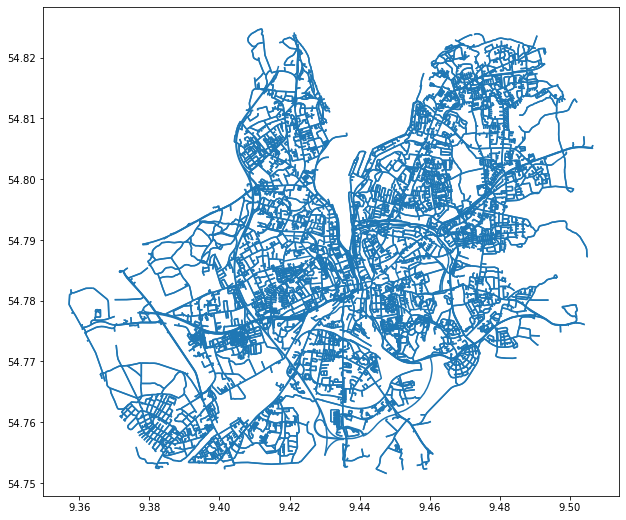

In [41]:
bikelane_links.plot(figsize=(16,9))

In [42]:
# Check if the columns you want to use later are in the columns above.
# If they appear as index names (printed bold), use the reset_index()
# function to create a new Data
dataTypeSeries = bikelane_nodes.dtypes
print(dataTypeSeries)
bikelane_nodes.columns.values

osmid              int64
y                float64
x                float64
street_count       int64
highway           object
geometry        geometry
dtype: object


array(['osmid', 'y', 'x', 'street_count', 'highway', 'geometry'],
      dtype=object)

In [43]:
# Rename columns and make them type string for later operations
bikelane_links.rename(columns={'u': 'from', 'v': 'to'}, inplace=True)
bikelane_links[['from', 'to']] = bikelane_links[['from', 'to']].astype(str)
bikelane_nodes['osmid'] = bikelane_nodes['osmid'].astype(str)
bikelane_nodes = bikelane_nodes.set_index('osmid')[['geometry']]
bikelane_links[['from', 'to']] = bikelane_links[['from', 'to']].astype(str)

In [44]:
# We can drastically reduce the disc space needed for this table by
# reducing the complexity of LineString geometries.
# For our purpose it is enough to have the start and end point of a link.
# Let's write a function
def simplify_link(g):
    l = list(g.coords)
    return geometry.LineString([l[0], l[-1]])
# Apply the function to all our links
bikelane_links['geometry'] = bikelane_links['geometry'].apply(simplify_link)

In [45]:
# Create a cleaner object and run cleaning functions on it
cy = OsmnxCleaner(
    bikelane_links, 
    bikelane_nodes, 
    a='from', 
    b='to'
)

In [46]:
cy.add_reversed_links(
    direction_column='oneway', 
    reverse_value=False # the boolean has been stored as a string    
)
#cy.clean_geometries() # Doesn't work, but let's hope we don't need it
cy.fix_nodeset_consistency()

In [47]:
cy.__dict__.keys()

dict_keys(['links', 'nodes'])

The cycling network is saved in cy.nodes and cy.links

## Public Transport

For PT, we need to convert GTFS feeds into links and nodes GeoDataFrames

In [48]:
pwd


'/Users/codygelbrich/Desktop/nic/Term_Paper/codycode'

In [49]:
# Load the GTFS feed
full_feed = importer.GtfsImporter(path='/Users/codygelbrich/Desktop/nic/input_folder/dataJ', dist_units='m')

# downloaded from https://gtfs.de/de/feeds/

In [50]:
print (full_feed)

* agency --------------------
	  agency_id                     agency_name          agency_url  \
0         1                      HSB direkt  http://www.bahn.de   
1        10  Oberhavel Verkehrsgesellschaft  http://www.bahn.de   
2       100      Regionalbusverkehr Südwest  http://www.bahn.de   
3       101                      Schulligen  http://www.bahn.de   
4       102                 Spree-Neiße Bus  http://www.bahn.de   

  agency_timezone agency_lang  
0   Europe/Berlin          de  
1   Europe/Berlin          de  
2   Europe/Berlin          de  
3   Europe/Berlin          de  
4   Europe/Berlin          de  
* calendar --------------------
	   monday  tuesday  wednesday  thursday  friday  saturday  sunday start_date  \
0       0        0          0         0       0         1       1   20210710   
1       0        0          0         0       1         0       1   20210709   
2       0        0          0         0       1         1       0   20210709   
3       0        0   

In [51]:
#print (full_feed)
#full_feed = full_feed.reset_index()
#full_feed.head(5)
#full_feed.describe()

In [52]:
import janitor
#feed_r = df.filter_date(start_date,'20210903', '20210903')

In [53]:
full_feed.describe()

,indicator,value
0,agencies,"[HSB direkt, Oberhavel Verkehrsgesellschaft, R..."
1,running_services,"[65, 10, 100, 53, 23, 22, 41, 13, 142, 70, 150..."
2,timezone,Europe/Berlin
3,start_date,20210705
4,end_date,20210712
5,num_routes,20338
6,num_trips,1258805
7,num_stops,454908
8,num_shapes,0
9,num_frequencies,0


In [54]:
#full_feed.dtypes

In [55]:
# And we can restrict it spacially if we write a suitable function
def spatial_restrict(feed, polygon, how='inner'):
    f = feed.copy()
    stops = f.stops.copy()
    stops['geometry'] = stops.apply(
        lambda r: geometry.Point([r['stop_lon'], r['stop_lat']]),
        axis=1
    )
    stops['included'] = stops['geometry'].apply(lambda g: polygon.contains(g))
    f.stops = f.stops.loc[stops['included'] == True]

    # relations
    f.stop_times = f.stop_times.loc[f.stop_times['stop_id'].isin(f.stops['stop_id'])]
    #f.transfers = f.transfers.loc[f.transfers['from_stop_id'].isin(f.stops['stop_id'])]
    #f.transfers = f.transfers.loc[f.transfers['to_stop_id'].isin(f.stops['stop_id'])]
    relevant_trips = (f.stop_times['trip_id'])
    f = f.restrict(trip_ids=relevant_trips)
    if how == 'inner':
        return f
    else:
        return feed.restrict(trip_ids=relevant_trips)

In [56]:
full_feed.stops['parent_station'] = 0

# Doesn't work? Written by Cody 10.Aug

In [57]:
# Give the hourly restricted feed to the spatial restriction
feed_s = spatial_restrict(full_feed, polygon=hull, how='inner')
# Also was not working Cody - 10. Aug

In [58]:
# Restrict the feed to a given date in order to analyse a
# typical work day and not the whole week
feed_r = feed_s.restrict(
    dates=['20210706'] # the dates must be within the feed start and end dates
)
#df = df.rename(columns={'start_date': 'sdts'})
#feed_r = full_feed.start_date['20210830']

In [59]:
# We can also restrict it to hours
time_range = ['00:00:00', '24:00:00'] 
feed_r = feed_r.restrict(time_range=time_range)
# feed_t = full_feed

In [60]:
# GTFS feeds are very complex. Have a look at Wikipedia for its structure
# We neet to perform some operations in order to transform it into a graph
feed = feed_r.copy()
feed.group_services()
#feed.build_stop_clusters(distance_threshold=300) # clusterize stops
feed.build_patterns(on='stop_id') # use on='cluster_id' if you built clusters
feed.trips['shape_id'] = 0

feed_frequencies = feed.convert_to_frequencies(time_range=time_range)

100%|█████████████████████████████████████████| 111/111 [00:02<00:00, 50.72it/s]


In [61]:
# We can build links and nodes now from the frequency graph
feed_frequencies.build_links_and_nodes()
feed_frequencies.build_geometries(use_utm=False)

export geometries in epsg: 32632


In [62]:
feed_frequencies.links.head(2)

,index,a,trip_id,link_sequence,departure_time,pickup_type,b,arrival_time,drop_off_type,time,...,pattern_id,route_id,service_id,direction_id,shape_id,route_long_name,route_short_name,agency_id,route_type,geometry
0,0,25368,10199_0,1,54420.0,NaN,89593,54480.0,NaN,60.0,...,10199_0,10199,55,0,0,840,840,70,3,"LINESTRING (9.50466 54.77597, 9.49043 54.77758)"
1,1,89593,10199_0,2,54480.0,NaN,344699,54540.0,NaN,60.0,...,10199_0,10199,55,0,0,840,840,70,3,"LINESTRING (9.49043 54.77758, 9.47831 54.77560)"


In [63]:
feed_frequencies.nodes.head(1)

,stop_name,stop_id,parent_station,geometry
3268,Adelby KTS/Kirche > Sünderup,451557,NaN,POINT (9.46589 54.78449)


In [64]:
# Make stop_id the unique index of nodes
# Use cluster_id if you built clusters before
feed_frequencies.nodes.set_index('stop_id', inplace=True)
len(feed_frequencies.nodes.loc[feed_frequencies.nodes.index.duplicated()])

0

In [65]:
# Rename the route types
mapping = {0:'tram', 1:'subway', 2:'rail', 3:'bus',
    4:'ferry', 5:'cable_car', 6:'gondola', 7:'funicular', 8:'walk', 9:'cycling'}

#walking & cycling hinzugefügt

feed_frequencies.links['route_type'] = feed_frequencies.links['route_type'].apply(
    lambda t: mapping.get(t, t)
)

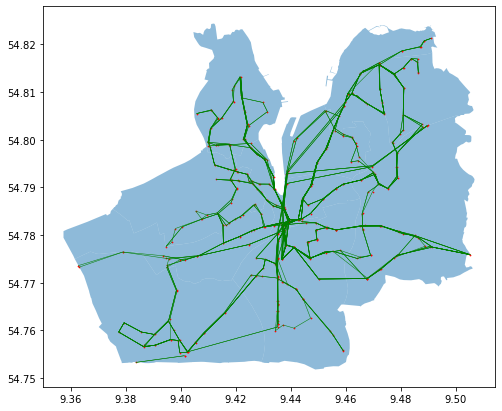

In [66]:
# Plot the results using matplotlib notation
ax = zones.plot(alpha=0.5, figsize=[17, 7])
ax = feed_frequencies.links.plot(linewidth=0.5, color='green', ax=ax)
plot= feed_frequencies.nodes.plot(markersize=0.5, color='red', ax=ax)

## Create the transport model

We have the network DataFrames and need to put them into a model now, to be able to run quetzal functions on it, that go beyond the scope of only one DataFrame

In [67]:
# Create the model with Coordinate Reference System 4326
sm = stepmodel.StepModel(epsg=4326, coordinates_unit='degree')

In [68]:
# Save zones into the model
sm.zones = zones

In [69]:
# Add road network
sm.road_links = oc.links[['a', 'b', 'length', 'geometry', 'highway']]
sm.road_nodes = oc.nodes[['geometry']]

In [70]:
# Add walk network
sm.footpath_links = wk.links[['a', 'b', 'length', 'geometry', 'highway']]
sm.footpath_nodes = wk.nodes[['geometry']]

In [71]:
# Add cycling network
sm.bikelane_links = cy.links[['a', 'b', 'length', 'geometry', 'highway']]
sm.bikelane_nodes = cy.nodes[['geometry']]

In [72]:
# Assign PT network to it with the columns we need
sm.links = feed_frequencies.links[['trip_id', 'a', 'b', 'link_sequence', 'time', 'headway',
                                   'pattern_id', 'route_id', 'service_id', 'direction_id',
                                   'agency_id', 'route_type', 'geometry']]
sm.nodes = feed_frequencies.nodes[['geometry', 'stop_name']]

In [73]:
sm.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'footpath_links', 'footpath_nodes', 'bikelane_links', 'bikelane_nodes'])

## Check integrity

Run quetzals integrity check functions to see if the networks are alright

In [74]:
# check and fix name collision in the indicies
sm.integrity_fix_collision()

can not add prefixes on table:  footpaths


In [75]:
sm.integrity_fix_road_network(cutoff=10, recursive_depth=5)

direct: 1677it [00:00, 6383.93it/s]
reversed: 1677it [00:00, 7465.54it/s]
1667it [00:00, 7399.02it/s]


In [76]:
# Fix PT
sm.integrity_fix_nodeset_consistency()
sm.integrity_fix_collision()
sm.integrity_fix_circular_lines()
sm.integrity_fix_sequences()
sm.integrity_fix_nodeset_consistency()

dropped circular lines: ['9368_1', '9854_1', '16940_3']


In [77]:
# Test
sm.integrity_test_all(errors='raise')

1667it [00:00, 29427.33it/s]
0it [00:00, ?it/s]

passed: integrity_test_circular_lines
passed: integrity_test_collision
passed: integrity_test_dead_ends
passed: integrity_test_isolated_roads
passed: integrity_test_nodeset_consistency


1667it [00:00, 6893.96it/s]


passed: integrity_test_road_network
passed: integrity_test_road_nodeset_consistency
passed: integrity_test_sequences


## Cluster PT stops

Clustering has the advantage of reducing the model's file size and computational expenses. You can also leaf this step out.

In [78]:
len(sm.nodes)


465

In [79]:
# Clusterize nodes
sm.preparation_clusterize_nodes(n_clusters=300)
sm.nodes.head(1)

,geometry
cluster,
0,POINT (9.490425999999999 54.777584)


In [80]:
len(sm.nodes)

300

In [81]:
# Now, some links might go from one stop to the same
sm.links = sm.links.loc[sm.links['a']!=sm.links['b']]

In [82]:
# Fix network integrity again
sm.integrity_fix_nodeset_consistency()
sm.integrity_fix_circular_lines()
sm.integrity_fix_sequences()
sm.integrity_fix_nodeset_consistency()
sm.integrity_fix_collision()

dropped circular lines: ['6731_0', '8996_0', '4648_2', '4648_3']
dropped broken sequences: []


In [83]:
# Check the integrity again
sm.integrity_test_all(errors='raise')

1667it [00:00, 31765.79it/s]
0it [00:00, ?it/s]

passed: integrity_test_circular_lines
passed: integrity_test_collision
passed: integrity_test_dead_ends
passed: integrity_test_isolated_roads
passed: integrity_test_nodeset_consistency


1667it [00:00, 7021.52it/s]


passed: integrity_test_road_network
passed: integrity_test_road_nodeset_consistency
passed: integrity_test_sequences


In [84]:
# Re-index nodes to prevent collision
sm.nodes.index = ['n_'+str(i) for i in sm.nodes.index]
sm.links['a'] = 'n_' + sm.links['a'].astype(str)
sm.links['b'] = 'n_' + sm.links['b'].astype(str)

In [85]:
sm.links.sample()

,trip_id,a,b,link_sequence,time,headway,pattern_id,route_id,service_id,direction_id,agency_id,route_type,geometry,disaggregated_a,disaggregated_b
index,,,,,,,,,,,,,,,
link_1172,5616_0,n_25,n_202,1,120.0,12343,5616_0,5616,55,0,70,bus,"LINESTRING (9.43671 54.77497, 9.43757 54.78097)",node_84453,node_423786


## Network connectors

We have road and PT links and nodes. Now we need to connect them for people to be able to switch and enter as they want

In [86]:
# Create a footpaths table
sm.preparation_footpaths(max_length=1000, n_clusters=300)
sm.footpaths.head(3)

,a,b,geometry,length,voronoi,time
footpath_0,n_154,n_14,"LINESTRING (9.377419 54.759655, 9.383637 54.75...",813.436287,1,976.123545
footpath_1,n_154,n_142,"LINESTRING (9.377419 54.759655, 9.385656000000...",528.489852,1,634.187822
footpath_2,n_154,n_64,"LINESTRING (9.377419 54.759655, 9.379364000000...",249.693308,1,299.631970


In [87]:
len(sm.footpaths)

1574

In [88]:
# Create access and egress links (ntlegs)
threshold = 200
sm.preparation_ntlegs(
    short_leg_speed=3, # km/h
    long_leg_speed=7, # km/h
    threshold=threshold, # m
    zone_to_transit=True, # zone centroid - PT connectors
    zone_to_road=True, # zone centroid - road connectors
    n_ntlegs=5 # number of connectors
)

In [89]:
# This is how the new tables look like
# Re-index them too
sm.zone_to_transit.index = ['ztt_'+str(i) for i in sm.zone_to_transit.index]
sm.zone_to_transit.sample(1)

,a,b,rank,distance,geometry,direction,speed_factor,short_leg_speed,long_leg_speed,speed,time,walk_time
ztt_68,n_103,zone_2,1,91.599352,LINESTRING (9.451828367308996 54.7984515447139...,eggress,0.676755,3,7,3.0,109.919223,109.919223


In [90]:
sm.zone_to_road.index = ['ztr_'+str(i) for i in sm.zone_to_road.index]
sm.zone_to_road.sample(1)

,a,b,rank,distance,geometry,direction,speed_factor,short_leg_speed,long_leg_speed,speed,time,walk_time
ztr_19,zone_8,310596903,1,357.832739,LINESTRING (9.486527146431856 54.8094016121831...,access,1.337596,3,7,4.012789,321.023097,321.023097


In [91]:
sm.road_to_transit.index = ['rtt_'+str(i) for i in sm.road_to_transit.index]
sm.road_to_transit.sample(1)

,a,b,rank,distance,geometry,direction,speed_factor,short_leg_speed,long_leg_speed,speed,time,walk_time
rtt_598,n_298,264244533,2,190.496672,"LINESTRING (9.466196 54.780994, 9.4633799 54.7...",access,0.975953,3,7,3.0,228.596006,228.596006


## Save the model

We have a complete network with connectors. Now save it.

quetzal provides two functions. One is the to_zip (and read_zip for loading again), which is very fast, but the file format is hdf5, which is not compatible with other programs.

The other option is to_json (and read_json), which saves tables as GeoJSON format. This is great to look at them in GIS software like QGIS, but it is slower for larger models.

Both functions take the location string as a first argument and optionally the only_attributes argument, where you can pass a list of table names that should be saved. All others are discarded.

In [92]:
sm.to_json('../../model/network')

to_hdf(overwriting):  64%|██████████████▏       | 27/42 [00:01<00:01, 14.50it/s]

could not save geometry from table fare_rules
could not save geometry from table fare_attributes
could not save geometry from table mode_nests
could not save geometry from table logit_scales
could not save geometry from table utility_values


to_hdf(overwriting): 100%|██████████████████████| 42/42 [00:10<00:00,  3.91it/s]

could not save attribute: missing_road_nodes
could not save attribute: missing_nodes
could not save attribute: orphan_nodes


In [93]:
import pandas as pd
import geopandas as gpd
import numpy as np
from geopy.distance import geodesic
from quetzal.model import stepmodel
from quetzal.io.display import all_pt_paths, path, pt_path

In [94]:
pwd

'/Users/codygelbrich/Desktop/nic/Term_Paper/codycode'

In [95]:
# Load the network model from the last exercise
model_path = '../../model/'
sm = stepmodel.read_json(model_path + 'network')

In [96]:
# How many zones do we have?
len(sm.zones)

11

## Preparation of OD-times

The pathfinders need a column "time" in the links or road_links tables to find the shortest paths. The PT pathfinder also applies a generalized boarding time (can be interpreted as a penalty for interchanging between transport carriers) and a waiting time, which is computed from the headway of PT carriers (waiting time equals half the headway (in seconds) assuming a randomly and evenly distributed arrival pattern of passengers on every PT stop).

In [97]:
sm.road_links.sample(1)

,a,b,length,geometry,highway
index,,,,,
4251,300831872,264496586,97.799,"LINESTRING (9.45289 54.78471, 9.45337 54.78388)",living_street


In [98]:
sm.links.sample(1)

,trip_id,a,b,link_sequence,time,headway,pattern_id,route_id,service_id,direction_id,agency_id,route_type,disaggregated_a,disaggregated_b,geometry
index,,,,,,,,,,,,,,,
link_899,4311_7,n_202,n_251,18,60.0,86400,4311_7,4311,55,0,136,bus,node_305762,node_433892,"LINESTRING (9.43760 54.78096, 9.43945 54.78330)"


In [99]:
# We don't see any length column in our links,
# but it is nice for calculating speeds and for later steps.
# We can cast the PT network onto the road network (as in A40)
# Start with the bus links
bus = sm.copy() # copy the whole model
bus.links = bus.links.loc[bus.links['route_type'].isin(['bus'])] # Filter
# Apply quetzal's casting function
bus.preparation_cast_network(
    nearest_method='nodes',
    n_neighbors_centroid=5, 
    n_neighbors=5, 
    penalty_factor=2,
    replace_nodes=False
)

8929_1: 100%|███████████████████████████████████| 99/99 [00:12<00:00,  8.25it/s]


In [100]:
bus.links.sample()

,trip_id,a,b,link_sequence,time,headway,pattern_id,route_id,service_id,direction_id,agency_id,route_type,disaggregated_a,disaggregated_b,road_a,road_b,road_node_list,road_link_list,road_length,geometry
index,,,,,,,,,,,,,,,,,,,,
link_303,16940_1,n_193,n_34,5,120.0,43200,16940_1,16940,55,0,70,bus,node_298984,node_398627,267048168,264496601,"[267048168, 264046804, 1565537407, 1565532862,...","[4234, 418, 7100, 4345, 4347, 5994, 5981, 4411...",2388.894,"LINESTRING (9.466034799999999 54.7818977, 9.46..."


In [101]:
# Now take the road_length of casted model (erstellte Modell) as the length of our genuine model (originale Model)
sm.links['length'] = np.nan # create a new column with default values
sm.links.loc[sm.links['route_type'].isin(['bus']),
             'length'] = bus.links['road_length']

#erstellt neue Spalte in links mit dem Namen length. Dort werden die Längen(road_length) der bus.links gespeichert

In [102]:
# For rail links, we can assign the geometric distance
sm.links.loc[sm.links['length'].isna(), 'length'] = \
    sm.links.loc[sm.links['length'].isna(), 'geometry'].apply(
        lambda l: int(geodesic(l.coords[0], l.coords[-1]).m))
# Take the geometric line and from it the start and end points, then calculate the meter distance in between
#Für die Bahn wird die geometrische Entfernung genutzt

In [103]:
# You can calculate the average bus operation speed
bus = sm.links.loc[sm.links['route_type'] == 'bus'] # filter
bus_lines = bus.groupby('route_id')[['time', 'length']].sum() # sum up time and length for each route
bus_speed = bus['length'].sum() / bus['time'].sum() # operation speed
print('bus_speed =', bus_speed, 'm / s')
#berechnet die Busgeschwindigkeit über die länge der links  und die zeit

bus_speed = 12.362758710348398 m / s


In [104]:
# Create the time LoS column for cars (it's already there for PT from the GTFS feeds)
car_speed = 5.8333333333333 #Binnenverkehr (21km/h) aus Mobilitätsbericht Flensburg 
sm.road_links['time'] = sm.road_links['length'] / car_speed # m/s

In [105]:
sm.road_links

,a,b,length,geometry,highway,time
index,,,,,,
1,26012989,654163464,183.731,"LINESTRING (9.39666 54.76167, 9.39776 54.76015)",secondary,31.496743
2,26012989,654163515,275.879,"LINESTRING (9.39666 54.76167, 9.39766 54.76322)",residential,47.293543
3,26012989,232927838,78.570,"LINESTRING (9.39666 54.76167, 9.39617 54.76232)",secondary,13.469143
4,26012995,1300501795,383.719,"LINESTRING (9.40250 54.75548, 9.40641 54.75809)",tertiary,65.780400
5,26012995,79484077,183.331,"LINESTRING (9.40250 54.75548, 9.40065 54.75422)",tertiary,31.428171
...,...,...,...,...,...,...
7497,269216504,9608933099,5.536,"LINESTRING (9.45950 54.80736, 9.45952 54.80741)",secondary,0.949029
7498,269216505,9608933099,99.247,"LINESTRING (9.46106 54.80734, 9.45952 54.80741)",residential,17.013771
7499,1667040721,9608933099,317.486,"LINESTRING (9.46110 54.81011, 9.45952 54.80741)",secondary,54.426171


In [106]:
len(sm.road_links)

7484

In [107]:
# If we want to compute walking paths on road links, we need a time for that to
sm.road_links['walk_time'] = sm.road_links['time'] * 3 # walk three times slower than car

### Walk

In [108]:
sm.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes'])

In [109]:
#sm.links

In [110]:
#Same for walking:
sm.footpath_links.sample(1)

,a,b,length,geometry,highway
index,,,,,
32751,9245745715,253558175,57.964,"LINESTRING (9.43944 54.78261, 9.43945 54.78209)",primary


In [111]:
sm.links.sample(1)

,trip_id,a,b,link_sequence,time,headway,pattern_id,route_id,service_id,direction_id,agency_id,route_type,disaggregated_a,disaggregated_b,geometry,length
index,,,,,,,,,,,,,,,,
link_110,1038_3,n_189,n_273,10,60.0,43200,1038_3,1038,55,0,136,bus,node_239302,node_137029,"LINESTRING (9.43371 54.78196, 9.43642 54.78250)",622.957


In [112]:
walk = sm.copy() # Copy the whole model and save it as 'walk'

In [113]:
walk.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes'])

In [114]:
walk.road_links = walk.footpath_links # Act as if the walking links were road links
walk.road_nodes = walk.footpath_nodes # Same for nodes

In [115]:
walk.road_links.sample()

,a,b,length,geometry,highway
index,,,,,
41927,1782551839,836209941,52.356,"LINESTRING (9.49075 54.80209, 9.49118 54.80169)",living_street


In [116]:
walk.links.sample()

,trip_id,a,b,link_sequence,time,headway,pattern_id,route_id,service_id,direction_id,agency_id,route_type,disaggregated_a,disaggregated_b,geometry,length
index,,,,,,,,,,,,,,,,
link_1040,5054_1,n_104,n_40,21,60.0,2057,5054_1,5054,55,0,136,bus,node_139477,node_318327,"LINESTRING (9.46220 54.80972, 9.46528 54.81385)",748.176


In [117]:
#walk.links['route_type'] = 'walk'

In [118]:
#walk.links.sample()

In [119]:
#walk.links = walk.links.loc[walk.links['route_type'].isin(['walk'])] # Filter

In [120]:
#walk.links.sample()

In [121]:
walk.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes'])

In [122]:
# Now take the road_length of casted model (erstellte Modell) as the length of our genuine model (originale Model)
#walk.links['length'] = np.nan # create a new column with default values
# --> es gibt bereits eine spalte mit length

In [123]:
#walk.links.sample()

In [124]:
#sm.links.loc[sm.links['route_type'].isin(['walk'])] # Filter

In [125]:
# Create the time LoS column for walking
walk_speed = 1.3888888888889 #Binnenverkehr & Wege unter 5km --> 5km/h aus Mobilitätsbericht Flensburg 
sm.footpath_links['time'] = sm.footpath_links['length'] / walk_speed # m/s
walk.road_links['time'] = walk.road_links['length'] / walk_speed

In [126]:
# If we want to compute walking paths on road links, we need a time for that to
sm.footpath_links['walk_time'] = sm.footpath_links['time'] * 1 # walk same time

In [127]:
walk.road_links


,a,b,length,geometry,highway,time
index,,,,,,
1,21929576,9077610843,6.139,"LINESTRING (9.46856 54.82250, 9.46864 54.82253)",path,4.42008
2,21929576,1851263511,31.839,"LINESTRING (9.46856 54.82250, 9.46815 54.82266)",path,22.92408
3,21929576,3417612920,47.207,"LINESTRING (9.46856 54.82250, 9.46917 54.82227)",path,33.98904
4,26012979,1288301276,25.413,"LINESTRING (9.38537 54.77486, 9.38504 54.77473)",service,18.29736
5,26012979,2021498995,9.452,"LINESTRING (9.38537 54.77486, 9.38549 54.77491)",path,6.80544
...,...,...,...,...,...,...
64236,9918461081,9918461067,3.670,"LINESTRING (9.43406 54.79266, 9.43401 54.79265)",path,2.64240
64237,9918461067,9918461081,3.670,"LINESTRING (9.43401 54.79265, 9.43406 54.79266)",path,2.64240
64238,1819999174,9929181776,8.573,"LINESTRING (9.45075 54.77648, 9.45062 54.77646)",service,6.17256


In [128]:
sm.road_links.sample(1)

,a,b,length,geometry,highway,time,walk_time
index,,,,,,,
7247,271098141,1743491819,74.933,"LINESTRING (9.47365 54.78287, 9.47482 54.78283)",residential,12.845657,38.536971


In [129]:
sm.footpath_links.sample(1)

,a,b,length,geometry,highway,time,walk_time
index,,,,,,,
51562,1820126728,1820126781,51.149,"LINESTRING (9.44856 54.77971, 9.44904 54.77998)",path,36.82728,36.82728


### Cycle

In [130]:
sm.bikelane_links.sample(1)

,a,b,length,geometry,highway
index,,,,,
20397,1832475157,1832475173,28.027,"LINESTRING (9.47028 54.79392, 9.47034 54.79407)",path


In [131]:
sm.links.sample(1)

,trip_id,a,b,link_sequence,time,headway,pattern_id,route_id,service_id,direction_id,agency_id,route_type,disaggregated_a,disaggregated_b,geometry,length
index,,,,,,,,,,,,,,,,
link_1354,7181_2,n_180,n_217,3,60.0,2700,7181_2,7181,55,0,70,bus,node_105671,node_83477,"LINESTRING (9.46082 54.80964, 9.45929 54.80700)",360.333


In [132]:
bike = sm.copy() # Copy the whole model and save it as 'bike'

In [133]:
bike.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes'])

In [134]:
bike.road_links = bike.bikelane_links # Act as if the walking links were road links
bike.road_nodes = bike.bikelane_nodes # Same for nodes

In [135]:
bike.road_links.sample()

,a,b,length,geometry,highway
index,,,,,
13920,1762121786,1762181591,31.682,"LINESTRING (9.47390 54.78354, 9.47376 54.78327)",residential


In [136]:
bike.road_nodes.sample()

,geometry
index,
1739216981,POINT (9.41843 54.75622)


In [137]:
#codes mit .links ausgelassen (da eigentlich nur für PT?)

In [138]:
# Create the time LoS column for walking
cycling_speed = 3.6111111111111 #Binnenverkehr 3.6111111111111 (13km/h) aus Mobilitätsbericht Flensburg (Durchschnitt Entfernung unter 5km und bis 10km)
sm.bikelane_links['time'] = sm.bikelane_links['length'] / cycling_speed # m/s
bike.road_links['time'] = bike.road_links['length'] / cycling_speed

In [139]:
# If we want to compute walking paths on road links, we need a time for that to
sm.bikelane_links['walk_time'] = sm.bikelane_links['time'] * 3.36 # walk time 1.25m/s

In [140]:
bike.road_links

,a,b,length,geometry,highway,time
index,,,,,,
1,21929576,9077610843,6.139,"LINESTRING (9.46856 54.82250, 9.46864 54.82253)",path,1.700031
2,21929576,1851263511,31.839,"LINESTRING (9.46856 54.82250, 9.46815 54.82266)",path,8.816954
3,21929576,3417612920,47.207,"LINESTRING (9.46856 54.82250, 9.46917 54.82227)",path,13.072708
4,26012979,1288301276,25.413,"LINESTRING (9.38537 54.77486, 9.38504 54.77473)",service,7.037446
5,26012979,2021498995,9.452,"LINESTRING (9.38537 54.77486, 9.38549 54.77491)",path,2.617477
...,...,...,...,...,...,...
59745,9918461081,9918461067,3.670,"LINESTRING (9.43406 54.79266, 9.43401 54.79265)",path,1.016308
59746,9918461067,9918461081,3.670,"LINESTRING (9.43401 54.79265, 9.43406 54.79266)",path,1.016308
59747,1819999174,9929181776,8.573,"LINESTRING (9.45075 54.77648, 9.45062 54.77646)",service,2.374062


In [141]:
sm.bikelane_links.sample(1)

,a,b,length,geometry,highway,time,walk_time
index,,,,,,,
38986,631782496,845335969,8.194,"LINESTRING (9.45495 54.75944, 9.45484 54.75941)",path,2.269108,7.624202


## Pathfinding

Next, we want to create a table of OD-relations for different modes, each, being representative for the performance of a specific mode on a specific OD pair.

Quetzal has multiple options for path finding, seperated into one function wrapper for road and one for PT. They create the `car_los` and `pt_los tables`, respectively.

For road transport, quetzal can simply compute one shortest path per OD pair or multiple ones if you had the capacities and volumes already saved in the model (comes from the assignment step at the very end). So, we just compute one path for now (`all_or_nothing=True`)

The PT pathfinder has two relevant attributes: `broken_modes` and `broken_routes`. If both are `False`, the pathfinder just searches for the shortest path between every OD pair, considering all PT modes and routes. If `broken_modes=True`, the pathfinder searches shortest paths for every possible mode combination. If `broken_routes=True`, the pathfinder searches shortest paths for every possible route combination. 
Additionally you can decide whether walking connections shall be done on roadsides or not with the `walk_on_road` parameter (question of computation time).

### Car

In [142]:
# Simple road pathfinder
sm.step_road_pathfinder(all_or_nothing=True)

In [143]:
len(sm.car_los)

121

In [144]:
sm.car_los.sample(5)

,origin,destination,time,path,node_path,link_path,ntlegs
64,zone_4,zone_8,1083.615067,"[zone_4, 325712391, 271098146, 315549401, 3155...","[325712391, 271098146, 315549401, 315549404, 3...","[4732, 5896, 5900, 5902, 6057, 4592, 6156, 719...","[(zone_4, 325712391), (310597434, zone_8)]"
28,zone_10,zone_5,1581.594318,"[zone_10, 268370787, 268370757, 268370755, 268...","[268370787, 268370757, 268370755, 268370760, 2...","[4418, 4416, 4423, 4266, 7226, 4410, 5980, 599...","[(zone_10, 268370787), (275572284, zone_5)]"
12,zone_1,zone_1,0.000000,[zone_1],[],[],[]
92,zone_7,zone_3,1299.246244,"[zone_7, 1688523512, 1020095318, 1621367232, 2...","[1688523512, 1020095318, 1621367232, 289384706...","[6995, 7111, 5611, 4617, 842, 1634, 1876, 280,...","[(zone_7, 1688523512), (275240057, zone_3)]"
80,zone_6,zone_2,642.074329,"[zone_6, 340042073, 73220641, 277143406, 31583...","[340042073, 73220641, 277143406, 315836682, 16...","[3951, 5326, 5910, 7133, 7499, 4491, 4596, 816...","[(zone_6, 340042073), (287252470, zone_2)]"


In [145]:
# Assign a length to LoS table
# Create a dictionary of road link lengths
len_dict = sm.road_links['length'].to_dict()
# Apply it to the link path column (sum up all links for each path)
sm.car_los['length'] = sm.car_los['link_path'].apply(
    lambda l: sum([len_dict[i] for i in l]))

In [146]:
# add the route type for sake of consistency
sm.analysis_car_route_type()

In [147]:
sm.car_los.sample()

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type
28,zone_10,zone_5,1581.594318,"[zone_10, 268370787, 268370757, 268370755, 268...","[268370787, 268370757, 268370755, 268370760, 2...","[4418, 4416, 4423, 4266, 7226, 4410, 5980, 599...","[(zone_10, 268370787), (275572284, zone_5)]",7142.408,"(car,)",car


In [148]:
sm.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes'])

### Walk

In [149]:
walk.step_road_pathfinder(all_or_nothing=True) # Find shortest paths

In [150]:
walk.__dict__.keys() #in (walk.)car_los sind meine walk_los gespeichert

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes'])

In [151]:
len(walk.car_los)

121

In [152]:
walk.car_los

,origin,destination,time,path,node_path,link_path,ntlegs
0,zone_0,zone_0,0.000000,[zone_0],[],[],[]
1,zone_0,zone_1,2683.769261,"[zone_0, 455190153, 1783775397, 1783775384, 17...","[455190153, 1783775397, 1783775384, 1783775380...","[48218, 48215, 48211, 36435, 43110, 40855, 408...","[(zone_0, 455190153), (232927756, zone_1)]"
2,zone_0,zone_10,2677.143919,"[zone_0, 272871873, 272871697, 1783775445, 273...","[272871873, 272871697, 1783775445, 273957495, ...","[35341, 48242, 35454, 35354, 35459, 40804, 482...","[(zone_0, 272871873), (268370790, zone_10)]"
3,zone_0,zone_2,3200.883655,"[zone_0, 272871873, 272871697, 1783775445, 273...","[272871873, 272871697, 1783775445, 273957495, ...","[35341, 48242, 35454, 35354, 35459, 40804, 482...","[(zone_0, 272871873), (287252470, zone_2)]"
4,zone_0,zone_3,2303.367050,"[zone_0, 272871873, 272871697, 1784407787, 272...","[272871873, 272871697, 1784407787, 272871872, ...","[35341, 48280, 35343, 35434, 48254, 40679, 625...","[(zone_0, 272871873), (275240057, zone_3)]"
...,...,...,...,...,...,...,...
116,zone_9,zone_5,2232.782170,"[zone_9, 261584351, 1828711638, 1828711646, 18...","[261584351, 1828711638, 1828711646, 1828711678...","[53300, 53303, 53305, 33385, 53314, 53317, 325...","[(zone_9, 261584351), (668977894, zone_5)]"
117,zone_9,zone_6,5494.129631,"[zone_9, 261584351, 1828711638, 1828711646, 18...","[261584351, 1828711638, 1828711646, 1828711678...","[53300, 53303, 53305, 33385, 53314, 53317, 325...","[(zone_9, 261584351), (340042073, zone_6)]"
118,zone_9,zone_7,3231.998212,"[zone_9, 261602220, 261607602, 1828519845, 182...","[261602220, 261607602, 1828519845, 1828519855,...","[32965, 53149, 53152, 32967, 60779, 45929, 406...","[(zone_9, 261602220), (1688523652, zone_7)]"
119,zone_9,zone_8,5821.593700,"[zone_9, 261602220, 261607602, 1828519845, 182...","[261602220, 261607602, 1828519845, 1828519855,...","[32965, 53149, 53152, 32967, 60779, 45929, 406...","[(zone_9, 261602220), (310597434, zone_8)]"


In [153]:
# Assign a length to LoS table
# Create a dictionary of road link lengths
len_dict = walk.footpath_links['length'].to_dict()
# Apply it to the link path column (sum up all links for each path)
walk.car_los['length'] = walk.car_los['link_path'].apply(
    lambda l: sum([len_dict[i] for i in l]))

In [154]:
# add the route type for sake of consistency
walk.analysis_car_route_type()
#???

In [155]:
# Save shortest paths table (LoS) in 'sm' and don't use 'walk' anymore
sm.walk_los = walk.car_los
#sm.footpath_links = walk.footpath_links # --> hier fehler?

In [156]:
sm.walk_los.sample()

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type
108,zone_8,zone_8,0.0,[zone_8],[],[],[],0.0,"(car,)",car


In [157]:
sm.walk_los['route_types'] = [('walk',) for i in sm.walk_los.index]

In [158]:
sm.walk_los['route_type'] = 'walk'

In [159]:
sm.walk_los.sample()

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type
56,zone_4,zone_1,5276.092256,"[zone_4, 345143229, 345143225, 1720514652, 271...","[345143229, 345143225, 1720514652, 271098165, ...","[39494, 46155, 34574, 46986, 42773, 34565, 467...","[(zone_4, 345143229), (232927756, zone_1)]",6690.463,"(walk,)",walk


In [160]:
sm.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes'])

### Bike

In [161]:
bike.step_road_pathfinder(all_or_nothing=True) # Find shortest paths

In [162]:
bike.__dict__.keys() #in (bike.)car_los sind meine bike_los gespeichert

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes'])

In [163]:
len(bike.car_los)

121

In [164]:
bike.car_los

,origin,destination,time,path,node_path,link_path,ntlegs
0,zone_0,zone_0,0.000000,[zone_0],[],[],[]
1,zone_0,zone_1,1243.768870,"[zone_0, 272871873, 272871697, 1783775445, 273...","[272871873, 272871697, 1783775445, 273957495, ...","[32879, 44860, 32981, 37932, 44836, 44833, 448...","[(zone_0, 272871873), (654163515, zone_1)]"
2,zone_0,zone_10,1303.153297,"[zone_0, 272871873, 272871697, 1784407787, 272...","[272871873, 272871697, 1784407787, 272871872, ...","[32879, 44895, 32881, 32961, 44875, 37888, 449...","[(zone_0, 272871873), (268370790, zone_10)]"
3,zone_0,zone_2,1385.544942,"[zone_0, 272871873, 272871697, 1784407787, 272...","[272871873, 272871697, 1784407787, 272871872, ...","[32879, 44895, 32881, 32961, 44875, 37888, 449...","[(zone_0, 272871873), (287252470, zone_2)]"
4,zone_0,zone_3,984.285235,"[zone_0, 272871873, 272871697, 1784407787, 272...","[272871873, 272871697, 1784407787, 272871872, ...","[32879, 44895, 32881, 32961, 44868, 37765, 583...","[(zone_0, 272871873), (275240057, zone_3)]"
...,...,...,...,...,...,...,...
116,zone_9,zone_5,1157.792517,"[zone_9, 261602220, 261607602, 1828519845, 182...","[261602220, 261607602, 1828519845, 1828519855,...","[30830, 49567, 49570, 30832, 56869, 49626, 308...","[(zone_9, 261602220), (273727173, zone_5)]"
117,zone_9,zone_6,2274.922982,"[zone_9, 261602220, 261607602, 1828519845, 182...","[261602220, 261607602, 1828519845, 1828519855,...","[30830, 49567, 49570, 30832, 56869, 42662, 377...","[(zone_9, 261602220), (340042073, zone_6)]"
118,zone_9,zone_7,1458.030864,"[zone_9, 261602220, 261607602, 1828519845, 182...","[261602220, 261607602, 1828519845, 1828519855,...","[30830, 49567, 49570, 30832, 56869, 42662, 377...","[(zone_9, 261602220), (1688523652, zone_7)]"
119,zone_9,zone_8,2476.750844,"[zone_9, 261602220, 261607602, 1828519845, 182...","[261602220, 261607602, 1828519845, 1828519855,...","[30830, 49567, 49570, 30832, 56869, 42662, 377...","[(zone_9, 261602220), (310597434, zone_8)]"


In [165]:
# Assign a length to LoS table
# Create a dictionary of road link lengths
len_dict = bike.bikelane_links['length'].to_dict()
# Apply it to the link path column (sum up all links for each path)
bike.car_los['length'] = bike.car_los['link_path'].apply(
    lambda l: sum([len_dict[i] for i in l]))

In [166]:
# add the route type for sake of consistency
bike.analysis_car_route_type()

In [167]:
# Save shortest paths table (LoS) in 'sm' and don't use 'bike' anymore
sm.bike_los = bike.car_los

In [168]:
sm.bike_los.sample()

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type
60,zone_4,zone_4,0.0,[zone_4],[],[],[],0.0,"(car,)",car


In [169]:
sm.bike_los['route_types'] = [('cycling',) for i in sm.bike_los.index]

In [170]:
sm.bike_los['route_type'] = 'cycling'

In [171]:
sm.bike_los.sample()

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type
46,zone_3,zone_10,1340.139539,"[zone_3, 275240057, 269678451, 1329374727, 269...","[275240057, 269678451, 1329374727, 269678736, ...","[31669, 40023, 31675, 51917, 57630, 37993, 316...","[(zone_3, 275240057), (268370790, zone_10)]",4168.976,"(cycling,)",cycling


In [172]:
sm.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes'])

### PT

In [173]:
# Simple PT
sm.step_pt_pathfinder(broken_modes=False, broken_routes=False, walk_on_road=False)

path_analysis: 100%|███████████████████████| 121/121 [00:00<00:00, 78916.31it/s]


In [174]:
len(sm.pt_los)

121

In [175]:
sm.pt_los.sample()

,origin,destination,gtime,path,pathfinder_session,reversed,boardings,alightings,node_path,link_path,footpaths,ntlegs,transfers,boarding_links,alighting_links,all_walk,ntransfers,time_link_path,length_link_path
9,zone_0,zone_8,3906.567053,"(zone_0, n_182, n_70, link_568, link_569, link...",best_path,False,[n_70],[n_15],"[n_182, n_70, n_15]","[link_568, link_569, link_570, link_571, link_...","[(n_182, n_70)]","[(zone_0, n_182), (n_15, zone_8)]",[],[link_568],[link_588],False,0,1320.0,13791.395


In [176]:
sm.pt_los.columns

Index(['origin', 'destination', 'gtime', 'path', 'pathfinder_session',
       'reversed', 'boardings', 'alightings', 'node_path', 'link_path',
       'footpaths', 'ntlegs', 'transfers', 'boarding_links', 'alighting_links',
       'all_walk', 'ntransfers', 'time_link_path', 'length_link_path'],
      dtype='object')

In [177]:
sm.links['route_type'].unique()

array(['bus'], dtype=object)

In [178]:
# Add route types to the paths
# The mode that appears first in the hierarchy is assigned as
# main mode, if there is more than one route_type used on the path
hierarchy = ['rail', 'subway', 'funicular', 'tram', 'bus', 'cycle', 'walk']
sm.analysis_pt_route_type(hierarchy)

array([[<AxesSubplot:title={'center':'ntransfers'}>]], dtype=object)

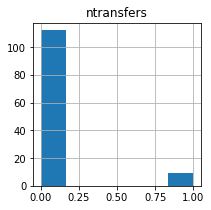

In [179]:
# How many transfers do we have?
sm.pt_los.hist(column='ntransfers', bins=6, figsize=(3,3))

<AxesSubplot:xlabel='route_types'>

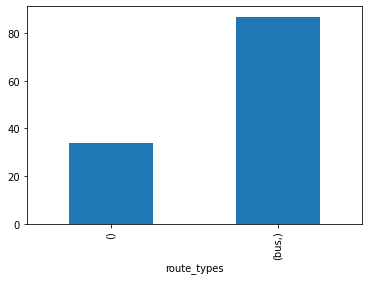

In [180]:
# How many connections do we have per mode combination in the shortest paths?
sm.pt_los['route_types'] = sm.pt_los['route_types'].apply(tuple) # bugfix
sm.pt_los.groupby('route_types').count()['route_type'].plot(kind='bar')

In [181]:
# Now, let's look at the results when we disaggregate paths by route_type
sm.step_pt_pathfinder(broken_modes=True, broken_routes=False, walk_on_road=False)

path_analysis: 100%|███████████████████████| 208/208 [00:00<00:00, 55745.38it/s]


In [182]:
# How many paths do we have now compared to 12,100,208,210 before?
len(sm.pt_los)

208

In [183]:
sm.analysis_pt_route_type(hierarchy)
sm.pt_los.sample()

,origin,destination,gtime,path,reversed,pathfinder_session,broken_modes,boardings,alightings,node_path,...,ntlegs,transfers,boarding_links,alighting_links,all_walk,ntransfers,time_link_path,length_link_path,route_types,route_type
79,zone_6,zone_10,2148.285256,"(zone_6, n_201, link_999, link_1000, link_1001...",False,mode_breaker,{},[n_201],[n_243],"[n_201, n_243]",...,"[(zone_6, n_201), (n_243, zone_10)]",[],[link_999],[link_1005],False,0,480.0,3024.592,"(bus,)",bus


<AxesSubplot:xlabel='route_types'>

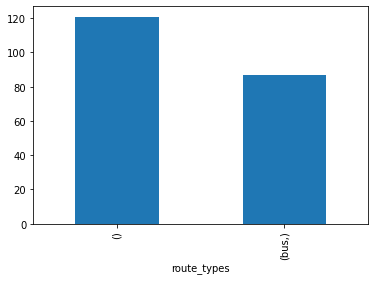

In [184]:
sm.pt_los['route_types'] = sm.pt_los['route_types'].apply(tuple) # bugfix
sm.pt_los.groupby('route_types').count()['route_type'].plot(kind='bar')

In [185]:
# Compute time attribute (from link path and footpaths and access links)
sm.analysis_pt_time()

In [186]:
# Closer look at one OD pair
sm.pt_los.loc[(sm.pt_los['origin']=='zone_3') & (sm.pt_los['destination']=='zone_10')][
    ['route_types', 'time', 'ntransfers']]

,route_types,time,ntransfers
46,(),3893.045402,0
46,"(bus,)",2729.867412,0


Reprojecting model from epsg 4326 to epsg 3857: 100%|█| 47/47 [00:06<00:00,  7.4
100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.59it/s]


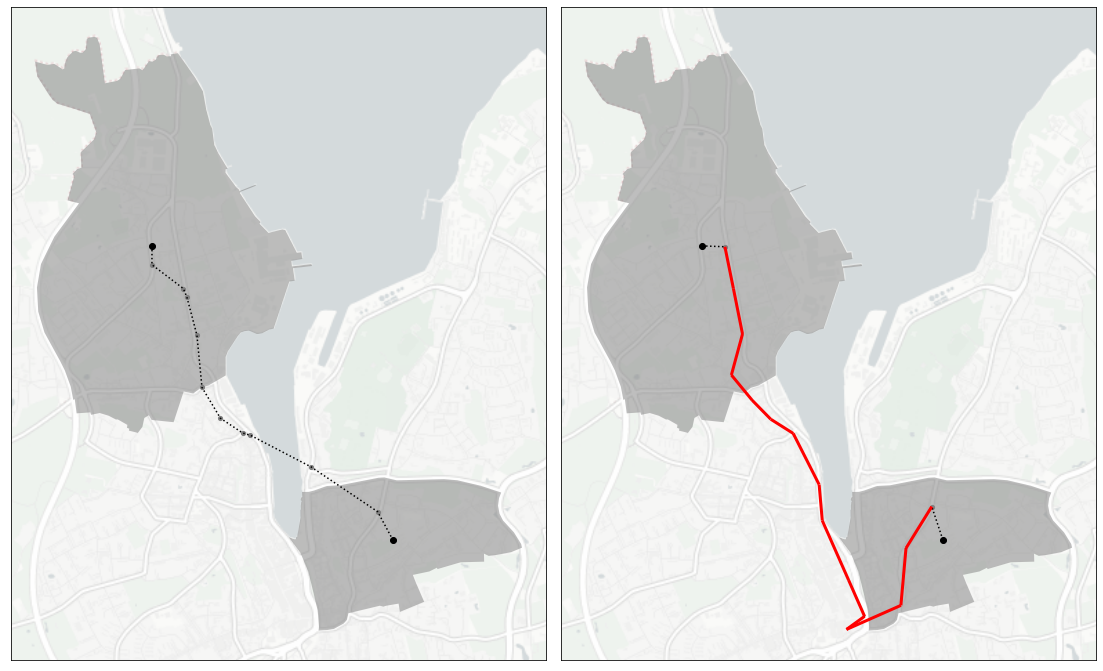

In [187]:
# Plot
plot = sm.change_epsg(3857, coordinates_unit=sm.coordinates_unit)
#plot.links['color'] = '#' + plot.links['route_color']
 
fig, axes = plot.plot_separated_paths(
    'zone_3','zone_10', rows=1, figsize=[16, 16],
    title=None, constrained_layout=True, zoom=13, resize=True,
    basemap_url='http://a.basemaps.cartocdn.com/light_nolabels/tileZ/tileX/tileY.png', 
)

In [188]:
# Assign a length to LoS table
sm.analysis_pt_length()

<AxesSubplot:>

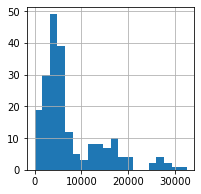

In [189]:
# Length distribution
sm.pt_los['length'].hist(bins=20, figsize=(3,3))

In [190]:
# Plot all paths between zones including car
path(sm, 'zone_3', 'zone_10', public=True, private=True,)
#???

In [191]:
sm.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes'])

## Prices

Add price LoS attribute to LoS tables

In [192]:
# Car usage has operating cost of 13ct/km in average
# Note: we don't apply sunk cost like maintenance or purchase cost
sm.car_los['price'] = sm.car_los['length'] * 0.13 / 1000

In [193]:
# For PT, we have a look at the PT operators price structure.
# For this toy model we simplify it to day tickets:
# https://www.aktiv-bus.de/fahrkarten/flensburg/
# Assume that a passenger makes two trips per day with a day ticket
sm.pt_los['price'] = 6/3.2 
# We don't re-build the exact price structure, but make longer trips more expensive
#sm.pt_los.loc[sm.pt_los['length']>10000, 'price'] = 10 / 2

In [194]:
#Fürs Gehen muss man nichts bezahlen
sm.walk_los['price']= 0  

In [195]:
#Fürs Radfahren muss man nichts bezahlen
sm.bike_los['price']= 0 

In [196]:
sm.pt_los.reset_index(inplace=True)

## Save model

In [197]:
sm.to_json(model_path + 'los_tables')

to_hdf(overwriting):  81%|█████████████████▊    | 38/47 [00:03<00:00, 21.65it/s]

could not save geometry from table fare_rules
could not save geometry from table fare_attributes
could not save geometry from table mode_nests
could not save geometry from table logit_scales
could not save geometry from table utility_values


to_hdf(overwriting): 100%|██████████████████████| 47/47 [00:15<00:00,  2.96it/s]


In [198]:
import pandas as pd
import geopandas as gpd
import numpy as np
from quetzal.model import stepmodel

In [199]:
pwd


'/Users/codygelbrich/Desktop/nic/Term_Paper/codycode'

In [200]:
# Load the model with LoS tables from the last exercise
model_path = '../../model/'

sm = stepmodel.read_json(model_path + 'los_tables')

## Step trip generation
In every zone we need to generate a column `emission` and `attraction`. What kind of trips you count to it largely affects the interpretability of your results. If you use employment characteristics only for attraction, your model will only be applicable to commuting questions, but not for shopping or leisure trips. Moreover, the results of a congestion analysis after the assignment step are worthless because the real network load is higher when you consider all demand segments.

In [201]:
# Lets see what data we have
sm.zones.sample(11)

,type,pop,name,emp,id,AREA,pop_dens,emp_dens,geometry
index,,,,,,,,,
zone_8,multipolygon,7607,Muerwik-2,2314,10,2970340.69,0.003,0.00078,"MULTIPOLYGON (((9.49141 54.81826, 9.49151 54.8..."
zone_10,multipolygon,8424,Juergensby,3091,7,1402414.74,0.006,0.00220,"MULTIPOLYGON (((9.43616 54.78844, 9.43649 54.7..."
zone_0,multipolygon,8034,Westlische_Hoehe,2452,3,4687233.26,0.002,0.00052,"MULTIPOLYGON (((9.40926 54.79851, 9.40782 54.7..."
zone_2,multipolygon,6909,Fruerlund,2410,8,2513307.48,0.003,0.00096,"MULTIPOLYGON (((9.43779 54.79169, 9.43770 54.7..."
zone_6,multipolygon,7607,Muerwik-1,4627,9,3549296.74,0.002,0.00130,"MULTIPOLYGON (((9.45215 54.80729, 9.45297 54.8..."
zone_5,multipolygon,8563,Altstadt_Neustadt,3042,1,1050230.54,0.008,0.00290,"MULTIPOLYGON (((9.43615 54.78844, 9.43506 54.7..."
zone_1,multipolygon,7435,Weiche,2551,5,8073283.42,0.001,0.00032,"MULTIPOLYGON (((9.36144 54.77498, 9.36481 54.7..."
zone_7,multipolygon,10901,Suedstadt_Sandberg,4008,6,7505967.16,0.001,0.00053,"MULTIPOLYGON (((9.42932 54.75337, 9.42961 54.7..."
zone_4,multipolygon,12584,Engelsby_Tarup,4393,11,8946281.90,0.001,0.00049,"MULTIPOLYGON (((9.50180 54.80515, 9.50135 54.8..."


<AxesSubplot:>

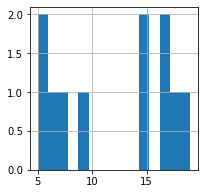

In [202]:
# Let's add the number of shops per zone to add at least this travel purpose
# Use random numbers for the toy model. Normally we would use land use data
# from OpenStreetMap (tutorials available)
# POI = point of interest
sm.zones['POIs'] = np.random.randint(5, 20, len(sm.zones))
# Check the distribution
sm.zones['POIs'].hist(bins=15, figsize=(3,3))

In [203]:
sm.zones

,type,pop,name,emp,id,AREA,pop_dens,emp_dens,geometry,POIs
index,,,,,,,,,,
zone_0,multipolygon,8034,Westlische_Hoehe,2452,3,4687233.26,0.002,0.00052,"MULTIPOLYGON (((9.40926 54.79851, 9.40782 54.7...",19
zone_1,multipolygon,7435,Weiche,2551,5,8073283.42,0.001,0.00032,"MULTIPOLYGON (((9.36144 54.77498, 9.36481 54.7...",6
zone_2,multipolygon,6909,Fruerlund,2410,8,2513307.48,0.003,0.00096,"MULTIPOLYGON (((9.43779 54.79169, 9.43770 54.7...",5
zone_3,multipolygon,12160,Nordstadt,3834,2,4032961.52,0.003,0.00095,"MULTIPOLYGON (((9.42829 54.80005, 9.42828 54.8...",17
zone_4,multipolygon,12584,Engelsby_Tarup,4393,11,8946281.90,0.001,0.00049,"MULTIPOLYGON (((9.50180 54.80515, 9.50135 54.8...",7
zone_5,multipolygon,8563,Altstadt_Neustadt,3042,1,1050230.54,0.008,0.00290,"MULTIPOLYGON (((9.43615 54.78844, 9.43506 54.7...",5
zone_6,multipolygon,7607,Muerwik-1,4627,9,3549296.74,0.002,0.00130,"MULTIPOLYGON (((9.45215 54.80729, 9.45297 54.8...",15
zone_7,multipolygon,10901,Suedstadt_Sandberg,4008,6,7505967.16,0.001,0.00053,"MULTIPOLYGON (((9.42932 54.75337, 9.42961 54.7...",18
zone_8,multipolygon,7607,Muerwik-2,2314,10,2970340.69,0.003,0.00078,"MULTIPOLYGON (((9.49141 54.81826, 9.49151 54.8...",15


In [204]:
# Start with emission and attraction derived from a mobility survey
#Emission aus EnSu_Survey
sm.zones.loc['zone_0', 'emission'] = (169.0 + 83.0) * 193.84 #Altstadt und Neustadt * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_1', 'emission'] = 123.0  * 193.84 #Nordstadt * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_2', 'emission'] = 117.0 * 193.84 #Westliche Höhe * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_3', 'emission'] = 78.0 * 193.84 #Friesischer Berg * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_4', 'emission'] = 108.0 * 193.84 #Weiche * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_5', 'emission'] = (85.0 + 203.0) * 193.84 #Südstadt und Sandberg * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_6', 'emission'] = 243.0 * 193.84 #Jürgensby * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_7', 'emission'] = 136.0 * 193.84 #Fruerlund * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_8', 'emission'] = 168.0/2 * 193.84 #Mürwik 1 * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_9', 'emission'] = 168.0/2 * 193.84 #Mürwik 2 * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_10', 'emission'] = (108.0 + 101.0) * 193.84 #Engelsby und Tarup * Aufskalierung auf Bevölkerung

#Attraction aus EnSu_Survey
sm.zones.loc['zone_0', 'attraction'] =  (230.0 + 68.0) * 193.84 #Altstadt und Neustadt * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_1', 'attraction'] =  88.0 * 193.84 #Nordstadt * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_2', 'attraction'] =  94.0 * 193.84 #Westliche Höhe * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_3', 'attraction'] =  75.0 * 193.84 #Friesischer Berg * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_4', 'attraction'] =  54.0 * 193.84 #Weiche * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_5', 'attraction'] =  (90.0 + 210.0) * 193.84 #Südstadt und Sandberg * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_6', 'attraction'] =  56.0 * 193.84 #Jürgensby * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_7', 'attraction'] =  42.0 * 193.84 #Fruerlund * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_8', 'attraction'] = 142.0/2 * 193.84 #Mürwik 1 * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_9', 'attraction'] = 142.0/2 * 193.84 #Mürwik 2 * Aufskalierung auf Bevölkerung
sm.zones.loc['zone_10', 'attraction'] = (110.0 + 25.0) * 193.84 #Engelsby und Tarup * Aufskalierung auf Bevölkerung

In [205]:
sm.zones

,type,pop,name,emp,id,AREA,pop_dens,emp_dens,geometry,POIs,emission,attraction
index,,,,,,,,,,,,
zone_0,multipolygon,8034,Westlische_Hoehe,2452,3,4687233.26,0.002,0.00052,"MULTIPOLYGON (((9.40926 54.79851, 9.40782 54.7...",19,48847.68,57764.32
zone_1,multipolygon,7435,Weiche,2551,5,8073283.42,0.001,0.00032,"MULTIPOLYGON (((9.36144 54.77498, 9.36481 54.7...",6,23842.32,17057.92
zone_2,multipolygon,6909,Fruerlund,2410,8,2513307.48,0.003,0.00096,"MULTIPOLYGON (((9.43779 54.79169, 9.43770 54.7...",5,22679.28,18220.96
zone_3,multipolygon,12160,Nordstadt,3834,2,4032961.52,0.003,0.00095,"MULTIPOLYGON (((9.42829 54.80005, 9.42828 54.8...",17,15119.52,14538.00
zone_4,multipolygon,12584,Engelsby_Tarup,4393,11,8946281.90,0.001,0.00049,"MULTIPOLYGON (((9.50180 54.80515, 9.50135 54.8...",7,20934.72,10467.36
zone_5,multipolygon,8563,Altstadt_Neustadt,3042,1,1050230.54,0.008,0.00290,"MULTIPOLYGON (((9.43615 54.78844, 9.43506 54.7...",5,55825.92,58152.00
zone_6,multipolygon,7607,Muerwik-1,4627,9,3549296.74,0.002,0.00130,"MULTIPOLYGON (((9.45215 54.80729, 9.45297 54.8...",15,47103.12,10855.04
zone_7,multipolygon,10901,Suedstadt_Sandberg,4008,6,7505967.16,0.001,0.00053,"MULTIPOLYGON (((9.42932 54.75337, 9.42961 54.7...",18,26362.24,8141.28
zone_8,multipolygon,7607,Muerwik-2,2314,10,2970340.69,0.003,0.00078,"MULTIPOLYGON (((9.49141 54.81826, 9.49151 54.8...",15,16282.56,13762.64


array([[<AxesSubplot:title={'center':'emission'}>,
        <AxesSubplot:title={'center':'attraction'}>]], dtype=object)

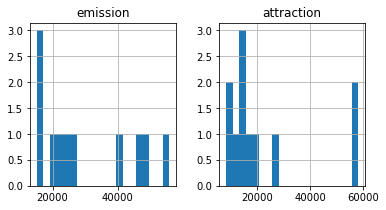

In [206]:
sm.zones[['emission', 'attraction']].hist(bins=20, figsize=(6,3))

In [207]:
# Now we need to introduce our demand segments.
# Car owners and PT captives is a good start.
# Other common demand segments are trip purposes, income groups, age groups.
sm.segments = ['car_owner', 'pt_captive']
car_ownership = 0.75 #Mobilitätsumfrage FL 2022
sm.zones[('car_owner', 'emission')] = sm.zones['emission'] * car_ownership
sm.zones[('pt_captive', 'emission')] = sm.zones['emission'] * (1-car_ownership)

sm.zones[('car_owner', 'attraction')] = sm.zones['attraction'] * car_ownership
sm.zones[('pt_captive', 'attraction')] = sm.zones['attraction'] * (1-car_ownership)

In [208]:
# Cast columns to integer
sm.zones[('car_owner', 'emission')] = sm.zones[('car_owner', 'emission')].astype(int)
sm.zones[('car_owner', 'attraction')] = sm.zones[('car_owner', 'attraction')].astype(int)

sm.zones[('pt_captive', 'emission')] = sm.zones[('pt_captive', 'emission')].astype(int)
sm.zones[('pt_captive', 'attraction')] = sm.zones[('pt_captive', 'attraction')].astype(int)

In [209]:
# Delete the non-segmented columns to prevent errors
del sm.zones['emission']
del sm.zones['attraction']
sm.zones.sample()

,type,pop,name,emp,id,AREA,pop_dens,emp_dens,geometry,POIs,"(car_owner, emission)","(pt_captive, emission)","(car_owner, attraction)","(pt_captive, attraction)"
index,,,,,,,,,,,,,,
zone_10,multipolygon,8424,Juergensby,3091,7,1402414.74,0.006,0.0022,"MULTIPOLYGON (((9.43616 54.78844, 9.43649 54.7...",9,30384,10128,19626,6542


## Step distribution

Once we have emission and attraction, we want to know the volumes per OD-pair. We can use the `step_distribution` function from quetzal. It uses the doubly constrained distribution (no probabilistic Logit approach), which is an iterative process where emissions and attractions are matched so that, on average, the minimal resistance for the whole system is found. Talking about resistance: an important input parameter is the impedance matrix, giving resistances between every OD-pair. Resistance can be time, but also cost or other utility/disutility quantifications.

Calibration of this step (not performed in this toy model) requires to change emission and attraction values or the impedance matrix

In [210]:
# Now, we need an impedance matrix for car and PT, respectively.
# Use time as resistance value, but distance or cost are thinkable, too
car_imp_matrix = sm.car_los[['origin', 'destination', 'time']].set_index(
    ['origin','destination']).unstack()
# Assign a resistance for staying in the home cell
car_imp_matrix = car_imp_matrix.replace(0, 120)

In [211]:
car_imp_matrix.head(3)

time                                                      \
destination       zone_0       zone_1      zone_10       zone_2       zone_3   
origin                                                                         
zone_0        120.000000   862.716080  1658.909988  1787.094296   768.779451   
zone_1        862.716080   120.000000  1817.056191  1945.240499  1371.078739   
zone_10      1652.817588  1835.806534   120.000000   399.296495  1888.786050   

                                                                              \
destination       zone_4       zone_5       zone_6       zone_7       zone_8   
origin                                                                         
zone_0       1696.814463   680.127947  2189.782825  1096.373953  2157.505478   
zone_1       1854.960666  1191.315692  2347.929027  1106.099347  2315.651681   
zone_10       844.562777  1581.594318   847.732251  1246.264724  1028.836878   

                          
destination       zone_9  
origin                    
zone_0        514.775329  
zone_1        586.757786  
zone_10      1725.464754

In [212]:
#impedance matrix walk
walk_imp_matrix = sm.walk_los[['origin', 'destination', 'time']].set_index(
    ['origin','destination']).unstack()
# Assign a resistance for staying in the home cell
walk_imp_matrix = walk_imp_matrix.replace(0, 120)

In [213]:
walk_imp_matrix.head(3)

time                                                      \
destination       zone_0       zone_1      zone_10       zone_2       zone_3   
origin                                                                         
zone_0        120.000000  2683.769261  2677.143919  3200.883655  2303.367050   
zone_1       2699.064221   120.000000  3803.787397  4509.855367  4655.262361   
zone_10      2677.143919  3803.787397   120.000000  1107.726802  2950.210911   

                                                                              \
destination       zone_4       zone_5       zone_6       zone_7       zone_8   
origin                                                                         
zone_0       4517.100030  1581.686026  4839.807217  3302.897568  5420.837867   
zone_1       5276.092256  3380.433468  6148.778928  3289.755849  6466.778458   
zone_10      1977.081270  1648.465813  2746.650364  2162.522722  3005.698787   

                          
destination       zone_9  
origin                    
zone_0       1267.638604  
zone_1       1545.011065  
zone_10      3158.602640

In [214]:
#impedance matrix bike
bike_imp_matrix = sm.bike_los[['origin', 'destination', 'time']].set_index(
    ['origin','destination']).unstack()
# Assign a resistance for staying in the home cell
bike_imp_matrix = bike_imp_matrix.replace(0, 120)

In [215]:
bike_imp_matrix.head(3)

time                                                     \
destination       zone_0      zone_1      zone_10       zone_2       zone_3   
origin                                                                        
zone_0        120.000000  1243.76887  1303.153297  1385.544942   984.285235   
zone_1       1249.651547   120.00000  1694.348037  1917.828666  1916.085605   
zone_10      1351.964035  1691.75659   120.000000   584.770200  1367.105754   

                                                                              \
destination       zone_4       zone_5       zone_6       zone_7       zone_8   
origin                                                                         
zone_0       1975.842749   854.926887  2040.984338  1510.757172  2331.006384   
zone_1       2299.667642  1595.473657  2573.268061  1518.851819  2775.095922   
zone_10       982.446686  1018.319099  1240.209595  1169.957058  1407.262843   

                          
destination       zone_9  
origin                    
zone_0        706.016038  
zone_1        769.974093  
zone_10      1401.266712

In [216]:
# In the PT case we have to take the minimum time per OD pair,
# because we have multiple routes
pt_imp_matrix = sm.pt_los.groupby(
    ['origin', 'destination']).agg({'time': 'min'}).unstack()

In [217]:
pt_imp_matrix = pt_imp_matrix.replace(0, 120)
pt_imp_matrix.head(3)

time                                                      \
destination       zone_0       zone_1      zone_10       zone_2       zone_3   
origin                                                                         
zone_0        120.000000  2612.729259  3018.164411  3671.841493  3016.316640   
zone_1       2612.729259   120.000000  2430.569215  3494.141183  4166.971462   
zone_10      3119.664411  2458.842581   120.000000  1243.254855  2560.784214   

                                                                              \
destination       zone_4       zone_5       zone_6       zone_7       zone_8   
origin                                                                         
zone_0       5080.491741  2426.545648  4226.677593  3750.905534  3906.567053   
zone_1       4492.896546  3155.779281  3864.651975  2952.322211  3318.971858   
zone_10      3307.964317  1819.853402  2047.527388  2620.127142  2297.884556   

                          
destination       zone_9  
origin                    
zone_0        805.720433  
zone_1       1564.064235  
zone_10      2330.688900

In [218]:
# We can perform the quetzal distribution function for all
# our demand segments simultaniously, saving us post-processing.
# Therefore, we need a dictionary with all parameters
distr_params = {'deterrence_matrix': {'car_owner': car_imp_matrix,
                                      'pt_captive': pt_imp_matrix,}}
sm.step_distribution(segmented=True, **distr_params)

car_owner
pt_captive


In [219]:
#distr_params

In [220]:
sm.volumes.head(3)

,origin,destination,car_owner,pt_captive,all
0,zone_0,zone_0,1251.793578,156.321312,1408.114891
1,zone_0,zone_1,2101.705645,907.565884,3009.271529
2,zone_0,zone_2,4180.229170,1358.056355,5538.285525


## Step mode choice

For mode choice we apply a nested logit model. In modeling terms, this step can be understood as the "logit" step, because the resulting utilities could also be used to compute the impedance matrix from above. You will see, that the logit step is entirely independent of the volumes and could, thus, be done earlier.

In [221]:
# First, we need parameters for our logit model.
# We define the nesting structure (i.e. choice tree)
# and the beta parameters which should come from a calibration
# using a mobility survey.
sm.preparation_logit(time= -0.00055, # beta_t --> los attributes /manuelle kallibrierung der estimation of demand --> Muss negativ sein!
                     price= -1, # beta_c  --> los attributes /manuelle kallibrierung der estimation of demand --> Muss negativ sein!
                     transfers=0, # we don't want the number of transfers matter (even though it does sometimes) --> los attributes /manuelle kallibrierung der estimation of demand --> muss negativ sein! davor 0
                     mode=1, # theta_root (ausm nested logit) --> max. 1 abr > 0
                     #pt_mode=0.5, # theta_pt (nest parameter for PT)
                     pt_path=0.1, # theta_path (nest parameter for different paths of one PT option)
                     segments=sm.segments
)
# For nest parameters you should take 1 >= mode >= pt_mode >= pt_path > 0

In [222]:
# Now we have generated the nesting structure table
# Can differ by demand segment, if you want
sm.mode_nests

segment,root,car_owner,pt_captive
route_type,,,
car,root,root,root
walk,root,root,root
root,NaN,NaN,NaN
bus,pt,pt,pt
pt,root,root,root


In [223]:
#so legst du eine neue Zeile mit einer neuen nest an, die eine Kopie der Zeile 'car' ist
sm.mode_nests.loc['cycling'] = sm.mode_nests.loc['car'].copy()

In [224]:
sm.mode_nests

segment,root,car_owner,pt_captive
route_type,,,
car,root,root,root
walk,root,root,root
root,NaN,NaN,NaN
bus,pt,pt,pt
pt,root,root,root
cycling,root,root,root


In [225]:
# And the corresponding theta values
sm.logit_scales

#alles auf 1 setzen!

segment,root,car_owner,pt_captive
route_type,,,
car,0.0,0.0,0.0
walk,0.0,0.0,0.0
root,1.0,1.0,1.0
bus,0.1,0.1,0.1
pt,1.0,1.0,1.0


In [226]:
#so legst du eine neue Zeile mit einer neuen choice option an, die eine Kopie der Zeile 'car' ist
sm.logit_scales.loc['cycling'] = sm.logit_scales.loc['car'].copy() 


In [227]:
sm.logit_scales

segment,root,car_owner,pt_captive
route_type,,,
car,0.0,0.0,0.0
walk,0.0,0.0,0.0
root,1.0,1.0,1.0
bus,0.1,0.1,0.1
pt,1.0,1.0,1.0
cycling,0.0,0.0,0.0


In [228]:
sm.logit_scales['root'] = 1
sm.logit_scales['car_owner'] = 1
sm.logit_scales['pt_captive'] = 1

In [229]:
sm.logit_scales.loc['bus'] = 1

In [230]:
sm.logit_scales

segment,root,car_owner,pt_captive
route_type,,,
car,1,1,1
walk,1,1,1
root,1,1,1
bus,1,1,1
pt,1,1,1
cycling,1,1,1


In [231]:
#NEUE TABELLENEINTÄGE MÜSSEN NOCH BEARBEITET WERDEN
#so bearbeitest du einen bestimmten Eintrag in der Matrix und setzt ihn auf 2 
#sm.logit_scales.loc['Zeilenname', 'spaltenname'] = 2 
# so bearbeitest du die ganze Zeile und setzt sie auf 2
#sm.logit_scales.loc['new_option'] = 2 
# so bearbeitest du die ganze Spalte und setzt sie auf 2
#sm.logit_scales['car'] = 2 

In [232]:
# And the Alternative-Specific-Constants (ASC)
# We have to prevent PT captives from using a car
sm.mode_utility.loc[ 'car', 'pt_captive'] = -100 #-100 #statischer Anteil 
sm.mode_utility

segment,root,car_owner,pt_captive
route_type,,,
car,0,0,-100
walk,0,0,0
root,0,0,0
bus,0,0,0


In [233]:
sm.mode_utility.loc['cycling'] = sm.logit_scales.loc['walk'].copy() 

In [234]:
sm.mode_utility

segment,root,car_owner,pt_captive
route_type,,,
car,0,0,-100
walk,0,0,0
root,0,0,0
bus,0,0,0
cycling,1,1,1


In [235]:
sm.mode_utility.loc['cycling'] = 0

In [236]:
sm.mode_utility

segment,root,car_owner,pt_captive
route_type,,,
car,0,0,-100
walk,0,0,0
root,0,0,0
bus,0,0,0
cycling,0,0,0


In [237]:
#Mittelwert aller Fahrzwecke aus MiD
sm.mode_utility.loc[ 'bus', 'car_owner'] = -2.999641523
sm.mode_utility.loc[ 'bus', 'pt_captive'] = 1.913239586
sm.mode_utility.loc[ 'car', 'car_owner'] = -2.999641523
sm.mode_utility.loc[ 'walk', 'car_owner'] = -4.663428861
sm.mode_utility.loc[ 'cycling', 'car_owner'] = -4.663428861
sm.mode_utility.loc[ 'cycling', 'pt_captive'] = -1.632390323
sm.mode_utility.loc[ 'walk', 'pt_captive'] = -1.632390323

In [238]:
sm.mode_utility

segment,root,car_owner,pt_captive
route_type,,,
car,0,-2.999642,-100.00000
walk,0,-4.663429,-1.63239
root,0,0.000000,0.00000
bus,0,-2.999642,1.91324
cycling,0,-4.663429,-1.63239


In [239]:
# And the beta parameters
# The column 'mode_utility' refers to the weight of the ASC table
# Delete the transfers attribute because we don't want it in our model formulation
sm.utility_values.drop('ntransfers', inplace=True)
sm.utility_values

segment,root,car_owner,pt_captive
value,,,
time,-0.00055,-0.00055,-0.00055
price,-1.00000,-1.00000,-1.00000
mode_utility,1.00000,1.00000,1.00000


In [240]:
#Anpassung der Werte durch ausprobieren
#mit Auto
sm.utility_values.loc[ 'price', 'car_owner'] = -1
sm.utility_values.loc[ 'time', 'car_owner'] = -0.000103125

#ohne Auto
sm.utility_values.loc[ 'price', 'pt_captive'] = -0.3125
sm.utility_values.loc[ 'time', 'pt_captive'] = -0.000103125

In [241]:
sm.utility_values

segment,root,car_owner,pt_captive
value,,,
time,-0.00055,-0.000103,-0.000103
price,-1.00000,-1.000000,-0.312500
mode_utility,1.00000,1.000000,1.000000


In [242]:
sm.__dict__.keys()

dict_keys(['parameters', 'debug', 'walk_on_road', 'coordinates_unit', 'epsg', 'segments', 'checkpoint_links', 'loaded_links', 'links', 'road_links', 'footpaths', 'lines', 'networkcaster_neighbors', 'networkcaster_road_access', 'node_parenthood', 'road_to_transit', 'zone_to_transit', 'zone_to_road', 'checkpoint_nodes', 'loaded_nodes', 'nodes', 'road_nodes', 'centroids', 'disaggregated_nodes', 'micro_zones', 'zones', 'node_clusters', 'fare_rules', 'fare_attributes', 'mode_nests', 'logit_scales', 'utility_values', 'car_los', 'cycling_los', 'cycle_los', 'walk_los', 'jsons', 'bike_los', 'volumes', 'pt_los', 'footpath_links', 'dead_ends', 'circular_lines', 'broken_sequences', 'bikelane_links', 'footpath_nodes', 'bikelane_nodes', 'mode_utility'])

In [243]:
sm.car_los.head(3)

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type,price
index,,,,,,,,,,,
0,zone_0,zone_0,0.000000,[zone_0],[],[],[],0.000,[car],car,0.000000
1,zone_0,zone_1,862.716080,"[zone_0, 455196992, 455190153, 455188901, 2739...","[455196992, 455190153, 455188901, 273956492, 4...","[6622, 6614, 4992, 6617, 6624, 4988, 5025, 733...","[[zone_0, 455196992], [232927756, zone_1]]",3258.348,[car],car,0.423585
2,zone_0,zone_10,1658.909988,"[zone_0, 272871873, 272871697, 273957495, 2728...","[272871873, 272871697, 273957495, 272872461, 4...","[4940, 4998, 4951, 3937, 4806, 5195, 5189, 518...","[[zone_0, 272871873], [268370787, zone_10]]",8441.089,[car],car,1.097342


In [244]:
sm.walk_los.head(3)

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type,price
index,,,,,,,,,,,
0,zone_0,zone_0,0.000000,[zone_0],[],[],[],0.000,[walk],walk,0
1,zone_0,zone_1,2683.769261,"[zone_0, 455190153, 1783775397, 1783775384, 17...","[455190153, 1783775397, 1783775384, 1783775380...","[48218, 48215, 48211, 36435, 43110, 40855, 408...","[[zone_0, 455190153], [232927756, zone_1]]",3234.273,[walk],walk,0
2,zone_0,zone_10,2677.143919,"[zone_0, 272871873, 272871697, 1783775445, 273...","[272871873, 272871697, 1783775445, 273957495, ...","[35341, 48242, 35454, 35354, 35459, 40804, 482...","[[zone_0, 272871873], [268370790, zone_10]]",3322.198,[walk],walk,0


In [245]:
sm.bike_los.head(3)

,origin,destination,time,path,node_path,link_path,ntlegs,length,route_types,route_type,price
index,,,,,,,,,,,
0,zone_0,zone_0,0.000000,[zone_0],[],[],[],0.000,[cycling],cycling,0
1,zone_0,zone_1,1243.768870,"[zone_0, 272871873, 272871697, 1783775445, 273...","[272871873, 272871697, 1783775445, 273957495, ...","[32879, 44860, 32981, 37932, 44836, 44833, 448...","[[zone_0, 272871873], [654163515, zone_1]]",3578.344,[cycling],cycling,0
2,zone_0,zone_10,1303.153297,"[zone_0, 272871873, 272871697, 1784407787, 272...","[272871873, 272871697, 1784407787, 272871872, ...","[32879, 44895, 32881, 32961, 44875, 37888, 449...","[[zone_0, 272871873], [268370790, zone_10]]",3676.082,[cycling],cycling,0


In [246]:
# Now, add segment specific ASC column to LoS table.
# But first we have to generate a combined LoS table
sm.los = pd.concat([sm.pt_los, sm.car_los, sm.walk_los, sm.bike_los]).reset_index(drop=True)
sm.los['route_types'] = sm.los['route_types'].apply(tuple)# bugfix
sm.analysis_mode_utility(how='main', # how refers to how to calculate the ASC from multiple paths
                         segment=None) # automatically iterates through segments

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 297.30it/s]


In [247]:
sm.los

,origin,destination,gtime,path,reversed,pathfinder_session,broken_modes,boardings,alightings,node_path,...,boarding_time,time,access_length,footpath_length,in_vehicle_length,length,price,mode_utility,"(car_owner, utility)","(pt_captive, utility)"
0,zone_0,zone_0,0.000000,[zone_0],False,mode_breaker,[bus],[],[],[],...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.875,-1.63239,-6.538429,-2.218328
1,zone_0,zone_1,2612.729259,"[zone_0, n_169, n_95, n_75, zone_1]",False,mode_breaker,[bus],[],[],"[n_169, n_95, n_75]",...,0.0,2612.729259,1259.436771,1468.241498,0.0,2727.678268,1.875,-1.63239,-6.807867,-2.487766
2,zone_0,zone_10,3959.650395,"[zone_0, n_182, n_86, n_179, n_101, n_210, n_3...",False,mode_breaker,[bus],[],[],"[n_182, n_86, n_179, n_101, n_210, n_36, n_279...",...,0.0,3959.650395,937.405666,2687.714920,0.0,3625.120585,1.875,-1.63239,-6.946768,-2.626667
3,zone_0,zone_2,4397.975793,"[zone_0, n_182, n_20, n_111, n_170, n_209, n_2...",False,mode_breaker,[bus],[],[],"[n_182, n_20, n_111, n_170, n_209, n_261, n_11...",...,0.0,4397.975793,888.821483,3069.901391,0.0,3958.722874,1.875,-1.63239,-6.991970,-2.671869
4,zone_0,zone_3,3825.720806,"[zone_0, n_164, n_144, n_82, n_258, n_191, n_1...",False,mode_breaker,[bus],[],[],"[n_164, n_144, n_82, n_258, n_191, n_150]",...,0.0,3825.720806,439.661643,2797.446864,0.0,3237.108507,1.875,-1.63239,-6.932956,-2.612855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,zone_9,zone_5,NaN,"[zone_9, 261602220, 261607602, 1828519845, 182...",NaN,NaN,NaN,NaN,NaN,"[261602220, 261607602, 1828519845, 1828519855,...",...,NaN,1157.792517,NaN,NaN,NaN,2814.546000,0.000,-1.63239,-4.782826,-1.751788
567,zone_9,zone_6,NaN,"[zone_9, 261602220, 261607602, 1828519845, 182...",NaN,NaN,NaN,NaN,NaN,"[261602220, 261607602, 1828519845, 1828519855,...",...,NaN,2274.922982,NaN,NaN,NaN,7352.445000,0.000,-1.63239,-4.898030,-1.866992
568,zone_9,zone_7,NaN,"[zone_9, 261602220, 261607602, 1828519845, 182...",NaN,NaN,NaN,NaN,NaN,"[261602220, 261607602, 1828519845, 1828519855,...",...,NaN,1458.030864,NaN,NaN,NaN,4159.411000,0.000,-1.63239,-4.813788,-1.782750
569,zone_9,zone_8,NaN,"[zone_9, 261602220, 261607602, 1828519845, 182...",NaN,NaN,NaN,NaN,NaN,"[261602220, 261607602, 1828519845, 1828519855,...",...,NaN,2476.750844,NaN,NaN,NaN,7615.184000,0.000,-1.63239,-4.918844,-1.887805


In [248]:
#LoS Tabelle nach Spalte Länge sortiert
#sm.los.sort_values(by=['length']).head(50) #aufsteigend
#sm.los.sort_values(by=['length'], ascending=False) #absteigend

In [249]:
# Finally, run the logit model
sm.initialize_logit()
# If you want to know what parameters you can give to the function,
# look into the code. You can find the most important functions in
# the quetzal/model/transportmodel.py file, which refers to sub-functions
# by importing them from other quetzal files
sm.step_logit()

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 16.90it/s]


In [250]:
# The result is a utilities table
sm.utilities.head(3)

route_type,origin,destination,segment,root,cycling,walk,car,pt,bus
0,zone_6,zone_0,car_owner,-3.535860,-4.875886,-5.043912,-4.593917,-5.309640,-5.309640
1,zone_6,zone_0,pt_captive,1.019459,-1.844847,-1.755047,-100.653196,0.892304,0.892304
2,zone_6,zone_1,car_owner,-3.617715,-4.926836,-5.187138,-4.717415,-5.284749,-5.284749


In [251]:
# and the probabilities
sm.probabilities #.head(50)

route_type,origin,destination,segment,root,cycling,walk,car,pt,bus
0,zone_6,zone_0,car_owner,1,0.261839,0.221341,3.471297e-01,0.169690,0.169690
1,zone_6,zone_0,pt_captive,1,0.057023,0.062380,6.984366e-45,0.880597,0.880597
2,zone_6,zone_1,car_owner,1,0.270057,0.208165,3.329711e-01,0.188806,0.188806
3,zone_6,zone_1,pt_captive,1,0.053641,0.052710,6.566165e-45,0.893649,0.893649
4,zone_6,zone_10,car_owner,1,0.162836,0.158934,5.581887e-01,0.120042,0.120042
...,...,...,...,...,...,...,...,...,...
17,zone_4,zone_7,pt_captive,1,0.435170,0.564830,7.007932e-44,0.000000,0.000000
18,zone_4,zone_8,car_owner,1,0.164130,0.158675,5.712696e-01,0.105926,0.105926
19,zone_4,zone_8,pt_captive,1,0.056687,0.071544,9.715464e-45,0.871770,0.871770
20,zone_4,zone_9,car_owner,1,0.231937,0.197449,4.239422e-01,0.146672,0.146672


In [252]:
# Moreover, you have now probabilities assigned to your paths!
sm.los.head(3)

,origin,destination,gtime,path,reversed,pathfinder_session,broken_modes,boardings,alightings,node_path,...,access_length,footpath_length,in_vehicle_length,length,price,mode_utility,"(car_owner, utility)","(pt_captive, utility)","(car_owner, probability)","(pt_captive, probability)"
0,zone_0,zone_0,0.000000,[zone_0],False,mode_breaker,[bus],[],[],[],...,0.000000,0.000000,0.0,0.000000,1.875,-1.63239,-6.538429,-2.218328,0.020633,0.217706
1,zone_0,zone_1,2612.729259,"[zone_0, n_169, n_95, n_75, zone_1]",False,mode_breaker,[bus],[],[],"[n_169, n_95, n_75]",...,1259.436771,1468.241498,0.0,2727.678268,1.875,-1.63239,-6.807867,-2.487766,0.023822,0.206073
2,zone_0,zone_10,3959.650395,"[zone_0, n_182, n_86, n_179, n_101, n_210, n_3...",False,mode_breaker,[bus],[],[],"[n_182, n_86, n_179, n_101, n_210, n_36, n_279...",...,937.405666,2687.714920,0.0,3625.120585,1.875,-1.63239,-6.946768,-2.626667,0.026736,0.022931


## Step assignment

This step combines the path probabilities with the volumes and loads them onto the networks.

In [253]:
sm.volumes.head(2)

,origin,destination,car_owner,pt_captive,all
0,zone_0,zone_0,1251.793578,156.321312,1408.114891
1,zone_0,zone_1,2101.705645,907.565884,3009.271529


In [254]:
sm.los.sample()

,origin,destination,gtime,path,reversed,pathfinder_session,broken_modes,boardings,alightings,node_path,...,access_length,footpath_length,in_vehicle_length,length,price,mode_utility,"(car_owner, utility)","(pt_captive, utility)","(car_owner, probability)","(pt_captive, probability)"
167,zone_5,zone_1,3009.650559,"[zone_5, n_186, n_105, n_89, n_126, link_612, ...",False,mode_breaker,[],[n_126],[n_235],"[n_186, n_105, n_89, n_126, n_235]",...,363.805525,878.741932,4609.878,5852.425457,1.875,1.91324,-5.185012,1.016932,0.121707,0.881361


In [255]:
# We want to do an assignment for cars and PT seperately
# (although there is a wrapper function in quetzal)
# Therefore, we must transfer the path probabilities to pt_los and car_los
sm.car_los = sm.los.loc[sm.los['route_type']=='car']
sm.pt_los = sm.los.loc[sm.los['route_type']!='car']
sm.walk_los = sm.los.loc[sm.los['route_type']=='walk']
sm.bike_los = sm.los.loc[sm.los['route_type']=='cycling']

In [256]:
sm.los.columns

Index([                     'origin',                 'destination',
                             'gtime',                        'path',
                          'reversed',          'pathfinder_session',
                      'broken_modes',                   'boardings',
                        'alightings',                   'node_path',
                         'link_path',                   'footpaths',
                            'ntlegs',                   'transfers',
                    'boarding_links',             'alighting_links',
                          'all_walk',                  'ntransfers',
                    'time_link_path',            'length_link_path',
                       'route_types',                  'route_type',
                       'access_time',               'footpath_time',
                   'in_vehicle_time',                'waiting_time',
                     'boarding_time',                        'time',
                     'access_lengt

In [257]:
sm.volumes 
#origin destionation hier gleich wie bei los tabelle. los nach fahrrad filtern probability von car owner x demad volumes je OD Paar je demand segment 

,origin,destination,car_owner,pt_captive,all
0,zone_0,zone_0,1251.793578,156.321312,1408.114891
1,zone_0,zone_1,2101.705645,907.565884,3009.271529
2,zone_0,zone_2,4180.229170,1358.056355,5538.285525
3,zone_0,zone_3,3360.723098,1097.125788,4457.848886
4,zone_0,zone_4,1115.907193,565.558981,1681.466174
...,...,...,...,...,...
116,zone_10,zone_6,1204.962023,701.479654,1906.441677
117,zone_10,zone_7,1481.725007,495.154941,1976.879948
118,zone_10,zone_8,1838.843381,807.713720,2646.557100
119,zone_10,zone_9,2452.191446,735.915476,3188.106922


In [258]:
sm.pt_los=sm.pt_los.append(sm.walk_los) #die walk tabelle bei der pt_los tabelle mit anhängen

In [259]:
# PT first
sm.segmented_pt_assignment(split_by='route_type', # identify from which route type the load comes
                           on_road_links=False, # load bus traffic to the road network (requires casted networks)
                           walk_on_road=True, 
                           path_column='link_path' # pt_los column with the path list
                          )
#mit los Tabelle

pt_captive: 100%|█████████████████████████████████| 2/2 [00:00<00:00, 11.91it/s]


In [260]:
# Now cars
sm.segmented_car_assignment() #probabilities für car x volume Tabelle; ergebnisse in car_los Tabelle; 

pt_captive: 100%|████████████████████████████████| 2/2 [00:00<00:00, 102.17it/s]


In [261]:
sm.loaded_links.loc[sm.loaded_links['load']!=0].sample()

,trip_id,a,b,link_sequence,time,headway,pattern_id,route_id,service_id,direction_id,...,length,duration,cost,origin,destination,geometry,"(load, walk)","(load, bus)","(load, cycling)",load
index,,,,,,,,,,,,,,,,,,,,,
link_1012,5054_0,n_148,n_41,20,60.0,2160,5054_0,5054,55,0,...,8319.092000000001,60.0,1140.0,n_148,n_41,"LINESTRING (9.43373 54.79226, 9.43030 54.79590)",0.0,2854.042913,0.0,2854.042913


In [262]:
sm.road_links.loc[sm.road_links[('all', 'car')]!=0].sample()

,a,b,length,time,walk_time,geometry,highway,"(car_owner, car)","(pt_captive, car)","(all, car)"
index,,,,,,,,,,
5383,41318228,281752768,247.371,42.406457,127.219371,"LINESTRING (9.43076 54.77758, 9.42789 54.77617)",tertiary,2453.1447,1.667736e-41,2453.1447


In [263]:
#sm.footpath_links.loc[sm.road_links[('all', 'walk')]!=0].sample()

In [264]:
sm.footpath_links.sample()
# --> demand segmente fehlen hier vgl. road_links

,a,b,length,time,walk_time,geometry,highway
index,,,,,,,
24977,1889786909,1889786913,41.057,29.56104,29.56104,"LINESTRING (9.47774 54.80796, 9.47710 54.80799)",service


In [265]:
sm.bikelane_links.sample()

,a,b,length,time,walk_time,geometry,highway
index,,,,,,,
24321,2007792543,313727192,34.62,9.587077,32.212578,"LINESTRING (9.48793 54.81432, 9.48797 54.81401)",residential


In [266]:
sm.road_links.sample()

,a,b,length,time,walk_time,geometry,highway,"(car_owner, car)","(pt_captive, car)","(all, car)"
index,,,,,,,,,,
5410,283628978,283629793,182.254,31.243543,93.730629,"LINESTRING (9.41956 54.75736, 9.42213 54.75770)",residential,NaN,NaN,0.0


<AxesSubplot:>

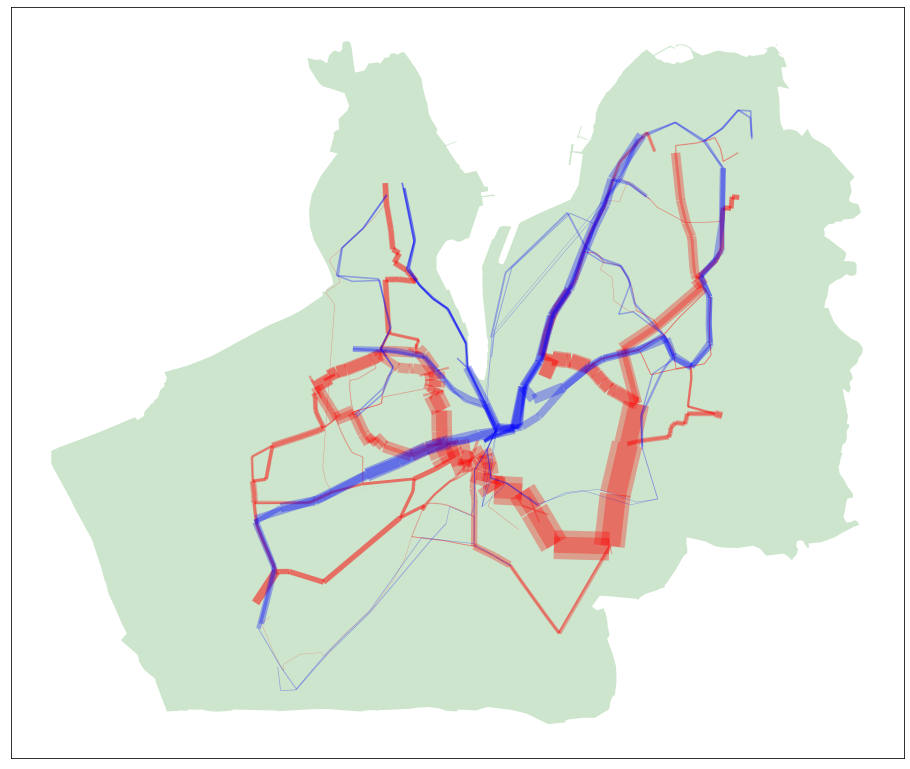

In [267]:
sm.loaded_links = gpd.GeoDataFrame(sm.loaded_links)
sm.road_links = gpd.GeoDataFrame(sm.road_links)
scaler = max(sm.loaded_links['load'].max(), sm.road_links[('all', 'car')].max()) / 35
sm.loaded_links.plot(alpha=.3, color='blue', linewidth=list(sm.loaded_links['load']/scaler),
    ax=sm.road_links.plot(alpha=.3, color='red', linewidth=list(sm.road_links[('all', 'car')]/scaler),
    #ax=sm.footpath_links.plot(alpha=.3, color='orange', linewidth=list(sm.footpath_links[('all', 'walk')]/scaler), --> klammer in letzte Zeile
        ax=sm.plot('zones', alpha=.2, color='green', figsize=(16,16))))
#zonen als letztes

<AxesSubplot:>

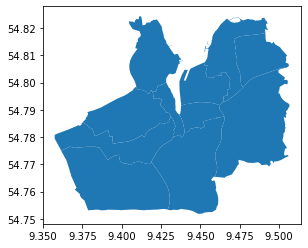

In [268]:
gpd.GeoDataFrame(sm.zones).plot()


In [269]:
# Summary of LoS table using a quetzal function
# All attributes are multiplied with path probabilities
od_sum = sm.summary_od(costs=['price', # EUR per person
                              'time', # seconds per ride
                              'in_vehicle_time', # seconds per ride
                              'length', # Meter distance
                              'ntransfers']) # per ride

In [270]:
# Compute passenger kilometer
for seg in sm.segments + ['root']:
    od_sum[(seg, 'pkm')] = od_sum[(seg, 'volume')] * od_sum[(seg, 'length')] / 1000
    # Adjust units of other indicators
    od_sum[(seg, 'in_vehicle_time')] = od_sum[(seg, 'in_vehicle_time')] / 3600
    od_sum[(seg, 'time')] = od_sum[(seg, 'time')] / 3600
    od_sum[(seg, 'length')] = od_sum[(seg, 'length')] / 1000

In [271]:
od_sum.sample(8)

segment                        car_owner                                      \
sum                               volume     price      time in_vehicle_time   
origin  destination mode                                                       
zone_4  zone_6      cycling    82.655791  0.000000  0.070446        0.000000   
zone_1  zone_3      bus       186.562242  0.251746  0.155410        0.062657   
zone_6  zone_0      walk     2638.473294  0.092844  0.621401        0.000000   
zone_4  zone_10     car       899.146640  0.259918  0.149628        0.000000   
zone_2  zone_6      cycling   154.542436  0.000000  0.035051        0.000000   
zone_3  zone_5      car       960.798841  0.239078  0.133399        0.000000   
zone_1  zone_9      walk      429.538216  0.083464  0.144159        0.000000   
zone_10 zone_5      walk     5767.984681  0.130840  0.247353        0.000000   

segment                                             pt_captive                \
sum                            length ntransfers        volume         price   
origin  destination mode                                                       
zone_4  zone_6      cycling  0.626812   0.000000  9.667513e+00  0.000000e+00   
zone_1  zone_3      bus      3.307630   0.134264  3.838578e+02  1.647793e+00   
zone_6  zone_0      walk     2.794945   0.000000  3.486880e+02  7.338393e-02   
zone_4  zone_10     car      1.999366   0.000000  5.420326e-41  2.959489e-44   
zone_2  zone_6      cycling  0.330157   0.000000  1.077884e+01  0.000000e+00   
zone_3  zone_5      car      1.839059   0.000000  6.928559e-42  3.669303e-45   
zone_1  zone_9      walk     0.581096   0.000000  4.158261e+02  7.894395e-01   
zone_10 zone_5      walk     0.888195   0.000000  4.079013e+03  7.844849e-01   

segment                                                    ...             \
sum                                  time in_vehicle_time  ... ntransfers   
origin  destination mode                                   ...              
zone_4  zone_6      cycling  2.484267e-02        0.000000  ...   0.000000   
zone_1  zone_3      bus      1.017230e+00        0.410117  ...   0.878823   
zone_6  zone_0      walk     1.884862e-01        0.000000  ...   0.000000   
zone_4  zone_10     car      1.703702e-44        0.000000  ...   0.000000   
zone_2  zone_6      cycling  1.182008e-02        0.000000  ...   0.000000   
zone_3  zone_5      car      2.047376e-45        0.000000  ...   0.000000   
zone_1  zone_9      walk     5.082126e-01        0.000000  ...   0.000000   
zone_10 zone_5      walk     5.618565e-01        0.000000  ...   0.000000   

segment                             root                                      \
sum                               volume     price      time in_vehicle_time   
origin  destination mode                                                       
zone_4  zone_6      cycling    92.323303  0.000000  0.065671        0.000000   
zone_1  zone_3      bus       570.420084  1.191200  0.735362        0.296476   
zone_6  zone_0      walk     2987.161290  0.090573  0.570868        0.000000   
zone_4  zone_10     car       899.146640  0.259918  0.149628        0.000000   
zone_2  zone_6      cycling   165.321281  0.000000  0.033536        0.000000   
zone_3  zone_5      car       960.798841  0.239078  0.133399        0.000000   
zone_1  zone_9      walk      845.364362  0.430726  0.323233        0.000000   
zone_10 zone_5      walk     9846.997312  0.401605  0.377633        0.000000   

segment                                              car_owner    pt_captive  \
sum                             length ntransfers          pkm           pkm   
origin  destination mode                                                       
zone_4  zone_6      cycling   0.584323   0.000000    51.809667  2.136945e+00   
zone_1  zone_3      bus      15.650895   0.635307   617.078823  8.310506e+03   
zone_6  zone_0      walk      2.559445   0.000000  7374.387757  2.710862e+02   
zone_4  zone_10     car      

array([<AxesSubplot:ylabel='(car_owner, volume)'>,
       <AxesSubplot:ylabel='(pt_captive, volume)'>], dtype=object)

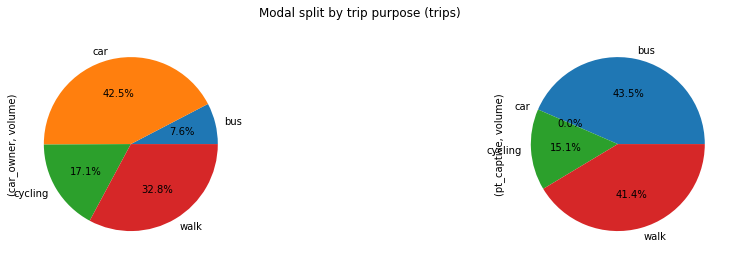

In [272]:
od_sum.loc[:, [(seg, 'volume') for seg in sm.segments]].groupby(level=2).sum().plot.pie(
    subplots=True, figsize=(16, 4), legend=False, title='Modal split by trip purpose (trips)', autopct = '%1.1f%%'
)

array([<AxesSubplot:ylabel='(car_owner, pkm)'>,
       <AxesSubplot:ylabel='(pt_captive, pkm)'>], dtype=object)

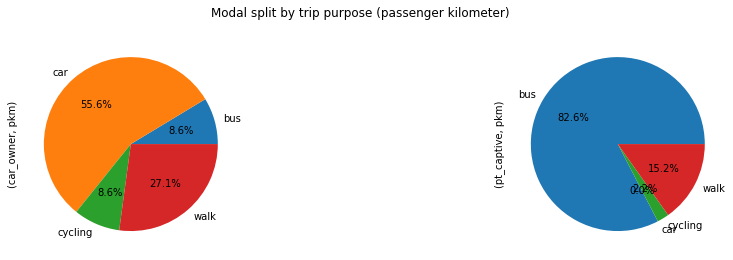

In [273]:
od_sum.loc[:, [(seg, 'pkm') for seg in sm.segments]].groupby(level=2).sum().plot.pie(
    subplots=True, figsize=(16, 4), legend=False, title='Modal split by trip purpose (passenger kilometer)', autopct = '%1.1f%%'
)

## Save model

In [274]:
# Save the od_sum as Excel
#with pd.ExcelWriter('../../outputs/od_summary.xlsx') as writer:  
with pd.ExcelWriter('od_summary.xlsx') as writer:
    od_sum.to_excel(writer, sheet_name='od_sum')

In [275]:
# make sure that all tables have unique indicies before saving
sm.probabilities.reset_index(inplace=True, drop=True)
sm.utilities.reset_index(inplace=True, drop=True)

In [276]:
sm.pt_los.reset_index(inplace=True)

In [277]:
sm.to_json(model_path + 'four_steps')

to_hdf(overwriting):  75%|████████████████▌     | 40/53 [00:03<00:00, 30.16it/s]

could not save geometry from table fare_rules
could not save geometry from table fare_attributes


to_hdf(overwriting): 100%|██████████████████████| 53/53 [00:14<00:00,  3.77it/s]

could not save attribute: parameters
